In [8]:
import numpy as np
import os
import pylab
import seaborn
import scipy.stats as sp
import pickle
import imageio
from scipy.spatial import distance
import json
from collections import OrderedDict
import os.path as osp
import pandas as pd
import copy
import scipy.stats as ss
import sys
import matplotlib.pyplot as plt
DIV_LINE_WIDTH = 50
print(np.__version__)
print(sys.executable)

1.18.1
/home/flowers/miniconda3/bin/python


In [41]:
def get_all_runs(logdir, condition=None, minlen=20):
    #print(logdir)
    """
    Recursively look through logdir for output files produced by
    Assumes that any file "progress.txt" is a valid hit. 
    """
    datasets = []
    for root, _, files in os.walk(logdir):
        print(root)
        if 'config.json' in files:
            run_name = root[13:]
            exp_name = None
            try:
                config_path = open(os.path.join(root,'config.json'))
                config = json.load(config_path)
                if 'exp_name' in config:
                    exp_name = config['exp_name']
                    
            except:
                print('No file named config.json')
            
            data_dict = {}
            data_dict['config'] = config
            #print(config)
            
            #if nb_epochs >= minlen:
            if True:
                if 'env_params_save.pkl' in files:
                    try:
                        env_params_dict = pickle.load( open(os.path.join(root,'env_params_save.pkl'), "rb" ) )
                    except EOFError:
                        print('Corrupted save, ignoring {}'.format(data_dict['config']['seed']))
                        continue
                    for k,v in env_params_dict.items():
                        if k == 'tasks_alps':
                            data_dict[k] = None
                        elif k == 'tasks_origin':
                            data_dict[k] = None
                        else:
                            data_dict[k] = v
#                           if k == 'epochs_score' or k == 'epochs_episode_nb':
#                               data_dict[k] = v
            
                        

                #print(data_dict.keys())
                datasets.append(data_dict)
#                 if not "epochs_score" in data_dict:
#                     print('ERRRRRRRRRRRRRRRROR {}'.format(run_name))
#                 else:
                print('{} -> {}'.format(run_name, len(data_dict['epochs_score'])))
    return datasets

def get_datasets(rootdir):
    print('loading all experiments located in {}'.format(rootdir))
    _, models_list, _ = next(os.walk(rootdir))
    print(models_list)
    for dir_name in models_list.copy():
        if "ignore" in dir_name:
            models_list.remove(dir_name)
    for expe_name in list(labels.keys()):
        if expe_name not in models_list:
            del labels[expe_name]
    
#     # setting specific colors for each expe
#     for i,m_name in enumerate(models_list):
#         if m_name in specific_colors:
#             colors[m_name] = specific_colors[m_name]
#         else:
#             colors[m_name] = default_colors[i]
            
    # setting per-model type colors    
    for i,m_name in enumerate(models_list):
        for m_type, m_color in per_model_colors.items():
            if m_type in m_name:
                colors[m_name] = m_color
        print("extracting data for {}...".format(m_name))
        m_id = m_name
        models_saves[m_id] = OrderedDict()
        models_saves[m_id]['data'] = get_all_runs(rootdir+m_name)
        print("done")
        if m_name not in labels:
            if 'ALP-GMM' in m_name:
                labels[m_name] = 'ALP-GMM'
            elif 'Oracle' in m_name:
                labels[m_name] = 'Oracle'
            elif 'Random' in m_name:
                labels[m_name] = 'Random'
            elif 'R_alpgmm_2exp' in m_name:
                labels[m_name] = 'AGAIN-R'
            elif 'T_alpgmm_2exp' in m_name:
                labels[m_name] = 'AGAIN-T'
            elif 'P_alpgmm_2exp' in m_name:
                labels[m_name] = 'AGAIN-P'
            elif 'R_alpgmm_-exp' in m_name:
                labels[m_name] = 'AGAIN-R(fine-tune)'
            elif 'T_alpgmm_-exp' in m_name:
                labels[m_name] = 'AGAIN-T(fine-tune)'
            elif 'P_alpgmm_-exp' in m_name:
                labels[m_name] = 'AGAIN-P(fine-tune)'
            elif 'R_no_alpgmm_2exp' in m_name:
                labels[m_name] = 'IN-R'
            elif 'T_no_alpgmm_2exp' in m_name:
                labels[m_name] = 'IN-T'
            elif 'P_no_alpgmm_2exp' in m_name:
                labels[m_name] = 'IN-P'
            elif 'R_no_alpgmm_-exp' in m_name:
                labels[m_name] = 'IN-R(fine-tune)'
            elif 'T_no_alpgmm_-exp' in m_name:
                labels[m_name] = 'IN-T(fine-tune)'
            elif 'P_no_alpgmm_-exp' in m_name:
                labels[m_name] = 'IN-P(fine-tune)'
            elif 'ADR' in m_name:
                labels[m_name] = 'ADR'
            else:
                labels[m_name] = m_name

    """
    retrieve all experiences located in "data to vizu" folder
    """
default_colors = ["violet","yellow",'green','black',u'#ff7f0e',
                      "cyan", "pink", u'#1f77b4',"grey","r",
                     "darkorchid","sienna","lightpink","blue","magenta", "indigo","mediumseagreen",'aqua',
                'deeppink','silver','khaki','goldenrod','y','y','y','y','y','y','y','y','y','y','y','y' ]  + ['y']*50
print(len(default_colors))
labels = OrderedDict()
per_model_colors = OrderedDict()

# LOAD DATA
models_saves = OrderedDict()
colors = OrderedDict()


#final_reg_toy_expes
#/ignore vizu run/
#final_reg_toy_expes/ignore vizu run/
#final_reg_toy_expes/ignore vizu run
get_datasets("teachDRL/students/data/") #
# print(per_model_colors)
# print(labels)
if per_model_colors:  # order runs for legend order as in per_models_colors, with corresponding colors
    ordered_labels = OrderedDict()
    for teacher_type in per_model_colors.keys():
        for k,v in labels.items():
            if teacher_type in k:
                ordered_labels[k] = v
    labels = ordered_labels
else:
    print('not using per_model_color')
    for k in models_saves.keys():
        labels[k] = k
        
print(labels)
print(colors)

84
loading all experiments located in teachDRL/students/data/
['toy_env_Self-Paced', 'toy_env_GoalGAN', 'toy_env_GoalGAN_NoPretrained', 'toy_env_Random', 'toy_env_ADR', 'toy_env_Covar-GMM', 'toy_env_RIAC', 'toy_env_Setter-Solver', 'toy_env_ALP-GMM']
extracting data for toy_env_Self-Paced...
teachDRL/students/data/toy_env_Self-Paced
teachDRL/students/data/toy_env_Self-Paced/toy_env_Self-Paced_COVERALL_s0
ents/data/toy_env_Self-Paced/toy_env_Self-Paced_COVERALL_s0 -> 21
done
extracting data for toy_env_GoalGAN...
teachDRL/students/data/toy_env_GoalGAN
teachDRL/students/data/toy_env_GoalGAN/toy_env_GoalGAN_s0
ents/data/toy_env_GoalGAN/toy_env_GoalGAN_s0 -> 21
done
extracting data for toy_env_GoalGAN_NoPretrained...
teachDRL/students/data/toy_env_GoalGAN_NoPretrained
teachDRL/students/data/toy_env_GoalGAN_NoPretrained/toy_env_GoalGAN_NoPretrained_s0
ents/data/toy_env_GoalGAN_NoPretrained/toy_env_GoalGAN_NoPretrained_s0 -> 21
done
extracting data for toy_env_Random...
teachDRL/students/data

In [35]:
# UTILS FOR PERF ANALYSIS
def plot_with_shade(subplot_nb, ax,x,y,err,color,shade_color,label,
                  y_min=None,y_max=None, legend=False, leg_size=30, leg_loc='best', title=None,
                  ylim=[0,100], xlim=[0,40], leg_args={}, leg_linewidth=8.0,
                    linewidth=7.0, ticksize=20,label_pad=None,zorder=None):
    #plt.rcParams.update({'font.size': 15})
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=ticksize)
    ax.plot(x,y, color=color, label=label,linewidth=linewidth,zorder=zorder)
    ax.fill_between(x,y-err,y+err,color=shade_color,alpha=0.2)
    if legend:
        leg = ax.legend(loc=leg_loc, fontsize=leg_size, **leg_args) #34
        for legobj in leg.legendHandles:
            legobj.set_linewidth(leg_linewidth)
    ax.set_xlabel('x1000 episodes', fontsize=30)
    if subplot_nb == 0:
        ax.set_ylabel('% Mastered cells', fontsize=30,labelpad=label_pad)
    ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    ax.set_ylim(bottom=ylim[0],top=ylim[1])
    if title:
        ax.set_title(title, fontsize=22)
        
def plot_boxplot(boxplot_data, labels, ax, colors, ylim=[0,60], label_size=20):

    print(labels)
    print(colors)
    ax.set_ylim(bottom=ylim[0],top=ylim[1])
    #plt.rcParams.update({'font.size': 15})
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=label_size)
    d = [b[0] for b in boxplot_data]
    medianprops = dict(linewidth=3.5, color='gold')
    bplot = ax.boxplot(d, labels=list(labels), patch_artist=True,
                      medianprops=medianprops)#, labels.items(), ax[0],colors)
    
    # rectangular box plot
#     bplot1 = axes[0].boxplot(all_data,
#                              vert=True,  # vertical box alignment
#                              patch_artist=True,  # fill with color
#                              labels=labels)  # will be used to label x-ticks
#     axes[0].set_title('Rectangular box plot')

    # fill with colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    ax.set_ylabel('% Mastered env', fontsize=20)

def plot_all_and_median(subplot_nb, ax,x,ys,color,label,
                        ylim=None, xlim=None, legend=False, title=None, leg_size=20):
    ax.locator_params(axis='x', nbins=5)
    ax.locator_params(axis='y', nbins=5)
    ax.tick_params(axis='both', which='major', labelsize=30)
    #print(ys)
            
    median = np.median(np.array(ys), axis=0)
    #print(median)
    for k,y in enumerate(ys):
        #print("max:{} last:{}".format(max(y), y[-1]))
        ax.plot(x[0:min_len],y, color=color, linewidth=1.5, alpha=0.5)
    ax.plot(x[0:min_len],median, color=color, linewidth=7 , label=label)
    if legend:
        leg = ax.legend(loc='bottom right', fontsize=leg_size)
    ax.set_xlabel('episodes (x1000)', fontsize=18)
    if subplot_nb == 0:
        ax.set_ylabel('% Mastered cubes', fontsize=18)
    if ylim is not None:
        ax.set_ylim(bottom=ylim[0],top=ylim[1])
    if xlim is not None:
        ax.set_xlim(xmin=xlim[0],xmax=xlim[1])
    if title:
        ax.set_title(title, fontsize=22)
        
def get_percentiles(data, label, max_ep=100):
    nb_zero_perf = np.count_nonzero(data[:max_ep]==0.0)
    print('{} -> nb zeros: {}'.format(label, nb_zero_perf))
    print('{} -> percentile: {}'.format(label, np.percentile(data[:max_ep],[25,50,75,90])))

def get_welch(algo_0='amb', algo_1='rmb', epoch=0, metric='epochs_score', verbose=True):
    if verbose:
        print("algo0:{}, algo1:{}".format(algo_0,algo_1))
    #print(j)
    final_explos = dict()
    for i,(m_id,d) in enumerate(models_saves.items()):
        if algo_0 in m_id or algo_1 in m_id:
            final_explos[m_id] = []
            #print(m_id)
            runs_data = d['data']
            ys = []
            if epoch != 0:
                long_enough = True
                for run in runs_data:
                    #print(len(run[metric]))
                    if len(run[metric]) < epoch:
                        long_enough = False
                if not long_enough:
                    print("aborting: {} not long enough".format(m_id))
                    return
            for run in runs_data:
                final_explos[m_id].append(run[metric][epoch-1])
                #print("ahh")
                    
    #print(final_explos[algo_0])
    #print(final_explos[algo_1])
    if verbose:
        print('welch {}'.format(ss.ttest_ind(final_explos[algo_0], final_explos[algo_1], equal_var=False)))
    else:
        res = ss.ttest_ind(final_explos[algo_0], final_explos[algo_1], equal_var=False)
        #print(res)
    return ss.ttest_ind(final_explos[algo_0], final_explos[algo_1], equal_var=False)

In [275]:
# TABLE STATS
agent_types = ['t']
plt.ion()
name_len = 29
final_table_names = []
final_table_stats = []
means_stats = {}
for k, a_type in enumerate(agent_types):
    for i,(m_id,label) in enumerate(labels.items()):
        if a_type in m_id and (not np.array([t in m_id for t in agent_types[0:k-1]]).any() or k==0):# or expert_tag in m_id:
            #             if 'hid' in m_id:
# #                 continue
#             if 'hid' in m_id:
#                 continue
# #             if 're' in m_id or 'gt' in m_id:
# #                 continue
#             if 'use_alpgmm' in m_id:
#                 continue
#             if 'rap' in m_id:
#                 continue
#             if not '_k' in m_id:
#                 continue
#             if '_T_' in m_id:
#                 continue
#             if not 'po' in m_id:
#                 continue
            #print(m_id)
#             if "k_5" in m_id:
#                 continue
            formated_m_id = copy.copy(m_id)
            formated_m_id = formated_m_id[14:]
            formated_m_id = formated_m_id.replace('_expert_type','',1)
            formated_m_id = formated_m_id.replace('use_alpgmm','wAG',1)
            if len(formated_m_id) < name_len:
                #print('adding {}'.format((name_len - len(m_id))))
                formated_m_id += ' ' * (name_len - len(formated_m_id))
        
                
            runs_data = models_saves[m_id]['data']
            ys = []
            for run in runs_data:
                data = run['epochs_score']
                #print(run.keys())
                episodes = np.array(run['epochs_episode_nb'])
                ys.append(data)
            #clean data    
            min_len = 999999
            for y in ys:
                if len(y) < min_len:
                    
                    min_len = len(y)
            ys_same_len = []
            last_val = []
            mid_val = []
            i_val = []
            for y in ys:
                ys_same_len.append(y[0:min_len])
                last_val.append(ys_same_len[-1][-1])
                i_val.append(ys_same_len[-1][8])
            #print(i_val)
            episodes = episodes[0:min_len]
            #episodes = [e/1000000 for e in episodes]
            
            percentiles = np.percentile(last_val,[25,50,75])
            

            #welchs = ss.ttest_ind(last_val, last_val_experts[k], equal_var=False)
            welchs=[42.2,42.2]
            
            print("{}: {}M, stats:{} +- {}, perc:{}, max:{}".format(formated_m_id,episodes[-1],
                                                 np.round(np.mean(ys_same_len,axis=0)[-1], 1),
                                                 np.round(np.std(ys_same_len,axis=0)[-1], 1),
                                                                 np.round(percentiles,1),
                                                                   np.round(np.max(ys_same_len,axis=0)[-1], 1)))
            means_stats[m_id] = np.round(np.mean(ys_same_len,axis=0)[-1],2)
            #print(get_welch(algo_0=m_id, algo_1='10-06_toy_env_teacher_ALP-GMM',verbose=False))
            

print('AGAIN - IN tests')
get_welch(algo_0='15-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR', algo_1='22-06_final_toy_env_teacher_CEGT_expert_type_R_pt_2', verbose=False)
get_welch(algo_0='15-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR', algo_1='15-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_gt_pt_0_sR', verbose=False)


ns_v2_teacher_CEGT_R_pt_1_cp_3_k_7: 200000M, stats:18.6 +- 34.0, perc:[1.9 2.6 3.3], max:98.2
y_env_teacher_CEGT_R_re_pt_0 : 200000M, stats:26.3 +- 41.1, perc:[ 0.   0.  86.2], max:96.2
ns_v2_teacher_CEGT_R_pt_1_cp_5_k_7: 200000M, stats:30.3 +- 40.7, perc:[ 2.   2.8 86. ], max:98.2
ns_v2_teacher_CEGT_R_wAG_pt_1_sR_cp_3_k_7: 200000M, stats:78.8 +- 19.1, perc:[68.6 84.1 94.3], max:100.0
ns_v2_teacher_CEGT_R_wAG_pt_1_sR_cp_100_k_7: 200000M, stats:91.7 +- 7.3, perc:[91.2 93.2 94.8], max:100.0
ns_v2_teacher_CEGT_R_wAG_pt_1_sR_cp_4_k_7: 200000M, stats:79.1 +- 19.9, perc:[62.7 85.5 95.3], max:100.0
y_env_teacher_CEGT_T_gt_pt_0 : 200000M, stats:88.9 +- 1.7, perc:[87.  89.1 91. ], max:91.2
ns_v2_teacher_CEGT_R_wAG_pt_1_sR_cp_100_k_7: 200000M, stats:94.8 +- 6.8, perc:[93.7 96.5 99. ], max:100.0
ns_v2_teacher_CEGT_R_wAG_pt_1_sR_cp_25_k_7: 200000M, stats:89.5 +- 15.5, perc:[89.7 95.  97.8], max:100.0
y_env_teacher_CEGT_T_wAG_gt_pt_0_sR: 200000M, stats:89.0 +- 1.7, perc:[87.2 89.2 91. ], max:91.8
n

Ttest_indResult(statistic=-1.3963272984436086, pvalue=0.168740608562024)

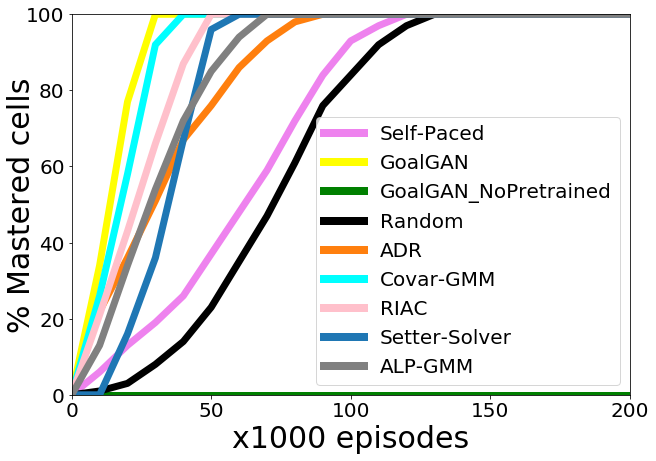

In [42]:
##### SIMPLE EXPE
#colors['28-04_CGT_leg_s_0.20_walk_t_0_expert_type_R_k_5_pt_4'] = 'blue'
agent_types = ['t']
legend = [True, True, True]#[False, False, True]
y_max = [100,100,100]#[35,65,100]
y_max_sem = [60,60,60]#[30,60,100]
plt.ion()
per_model_colors = {}
per_model_colors = OrderedDict([('ALP-GMM',(u'#1f77b4','4')),
                                ('AGAIN-R_GT',('green','1')),
                                ('AGAIN-R_RND',('deeppink','2')),
                                ('AGAIN-R',(u'#9467bd','0')),    #yesyes
                                ('IN-R_GT',('green','9')), #noyes
                                ('IN-R_RND',('deeppink','9')), #noyes
                                ('IN-R',('indianred','3')), #noyes
                                ('Random',("grey",'6')),
                                ('ADR',('darkorange','5'))])
        
    
def get_expert_initial_perfs(expert_id):
    runs_data = models_saves[expert_id]['data']
    ys = []
    for run in runs_data:  
        data = run['nb_mastered'][0:20]
        episodes = np.array(run['total timesteps'][0:20])
        assert(len(data) == 20)
        ys.append(data)
    means = np.mean(ys,axis=0)
    stds = np.std(ys,axis=0)
    episodes = episodes[0:20]
    episodes = [e/1000000 for e in episodes]
    return means, stds, episodes
          
#print(labels)
for k, a_type in enumerate(agent_types):
    c_idx = -1
    plt.figure(figsize=(10,7))
    ax = plt.gca()
    ax = [ax]
    boxplot_data = []
    #idxlab=0
    for i,(m_id,label) in enumerate(labels.items()):
        if a_type in m_id:# or expert_tag in m_id:
            if '_P_' in m_id:
                continue
            if '_T_' in m_id:
                continue
            if '_R_' in m_id and not 'alpgmm' in m_id and ('gt' in m_id or 're' in m_id):
                continue
            if 'ns' in m_id:
                continue
                
            # AGAIN conds
#             if not('CEGT_expert_type_R_' not in m_id or ('CEGT_expert_type_R_' in m_id and 'alpgmm' in m_id)):
#                 continue
    
            # IN conds
#             if 'Random' in m_id:
#                 continue
#             if not ('_R_' in m_id and 'use_alpgmm' in m_id) and not 'ALP-GMM' in m_id:
#                 continue

#             if not ('pt_0' in m_id or 'ALP' in m_id or 'pt_2' in m_id):
#                 continue
            c_idx += 1
#             print(m_id)
            runs_data = models_saves[m_id]['data']
            ys = []
            for run in runs_data:  
                data = run['epochs_score']
                #print(run['epochs_comp_grid'][1])
                #print(run['epochs_score'])
                #print(run['time'][-1])
                #print(len(run['time']))
                #print(run.keys())
                ys.append(data)
#                 if 'cegt_k' in run.keys():
#                     print('kkkkkkkkkkkkkkkkkkkkkkkkkkk={}'.format(run['cegt_k']))
            #print(runs_data)
            episodes = np.array(runs_data[0]['epochs_episode_nb'])
            #print(episodes)
                

            #clean data    
            min_len = 999999
            for y in ys:
                if len(y) < min_len:
                    
                    min_len = len(y)
            ys_same_len = []
            for y in ys:
                ys_same_len.append(y[0:min_len])
            #print("{} +- {}".format(np.round(np.mean(ys_same_len,axis=0)[-1], 1),
            #                        np.round(np.std(ys_same_len,axis=0)[-1], 1)))
            episodes = episodes[0:min_len]
            episodes = [e/1000 for e in episodes]
            #print(episodes)
            sems = np.std(ys_same_len,axis=0)/np.sqrt(len(ys_same_len)) # sem
            stds = np.std(ys_same_len,axis=0) # std
            means = np.mean(ys_same_len,axis=0)
#             if ('EGT' in m_id or "CGT" in m_id) and 'hmn' not in m_id: # add initial expert data
#                 exp_means, exp_stds, exp_ep = expert_perfs[a_type]
#                 means = np.array(exp_means.tolist() + means.tolist())
#                 stds = np.array(exp_stds.tolist() + stds.tolist())
#                 episodes = exp_ep + [ep + exp_ep[-1] for ep in episodes]
            
            # format data for boxplot:
            median = np.median(np.array(ys_same_len), axis=0)
            last_ys = [y[-1] for y in ys_same_len] # WARNIIIIIIIIIIIIIIING 99 not -1
            pers = np.percentile(last_ys,[25,50,75])
            boxplot_data.append((last_ys, pers[1], pers[0],pers[2]))
            formated_m_id = copy.deepcopy(m_id)
            formated_m_id = formated_m_id[28:]
            formated_m_id = formated_m_id.replace('CEGT_expert_type_R_use_alpgmm_','AGAIN-R_',1)
            formated_m_id = formated_m_id.replace('CEGT_expert_type_R_','IN-R_',1)
            formated_m_id = formated_m_id.replace('re_pt_0','RND',1)
            formated_m_id = formated_m_id.replace('gt_pt_0','GT',1)
            formated_m_id = formated_m_id.replace('_pt_2','',1)
            #formated_m_id = formated_m_id.replace('_pt_4','',1)
            formated_m_id = formated_m_id.replace('_sR','',1)
            formated_m_id = formated_m_id.replace('_expert_type','',1)
            formated_m_id = formated_m_id.replace('use_alpgmm','wAG',1)
            color = default_colors[c_idx]
            for name, (name_color, _) in per_model_colors.items():
                if name in formated_m_id:
                    color = name_color
                    break
            
#             plot_all_and_median(0, ax[0], episodes,ys_same_len,color,formated_m_id,
#                                 title="toy_env ALP-GMM classroom".format(a_type), legend=True,
#                                 ylim=[0,y_max[k]], xlim=[0,200], leg_size=15)
            zorder=10 if formated_m_id == 'AGAIN-R' else None
            plot_with_shade(0, ax[0],episodes,means, sems, color,#default_colors[c_idx],
                            color,m_id.replace("toy_env_",''),
                            legend=True,ylim=[0,y_max[k]], xlim=[0,200], leg_size=20, label_pad=-10,
                           zorder=zorder)

    # REORDING LEGEND ACCORDING TO PER MODEL COLOR
#     leg_handles, leg_labels = ax[0].get_legend_handles_labels()
#     # sort both labels and handles by labels
# #     leg_labels, leg_handles = zip(*sorted(zip(leg_labels, leg_handles), key=lambda t: per_model_colors[t[0]][1]))
#     leg = ax[0].legend(leg_handles, leg_labels, fontsize=22)
#     for legobj in leg.legendHandles:
#         legobj.set_linewidth(8.0)
    #plt.tight_layout()
    plt.savefig('teachDRL/graphics/toy_env_vizu.png'.format(m_id),
            bbox_inches='tight')
#     plt.savefig('teachDRL/graphics/classroom/toy_env/reg_toy_env_vizu.svg'.format(m_id),
#             bbox_inches='tight')
#     plt.savefig('teachDRL/graphics/classroom/toy_env/reg_toy_env_vizu.pdf'.format(m_id),
#             bbox_inches='tight')

#     a_type_labels = []
#     a_type_colors = []
#     for m_id, label in labels.items():
# #         if 'k_5' in m_id or 'pt_3' in m_id or 'pt_4' in m_id:
# #             continue
#         if a_type in m_id:# or expert_tag in m_id:
#             formated_m_id = copy.copy(m_id)
#             #formated_m_id = formated_m_id.replace('Meta-ACL_IN','AGAIN_',1)
#             formated_m_id = formated_m_id.replace('_expert_type','',1)
#             formated_m_id = formated_m_id.replace('_use_alpgmm','+AlpGmm',1)
#             formated_m_id = formated_m_id.replace('Meta-ACL','',1)
#             formated_m_id = formated_m_id.replace('_IN_R','',1)
#             formated_m_id = formated_m_id.replace('_all-walkers','',1)
#             a_type_labels.append(formated_m_id)
#             a_type_colors.append(colors[m_id])
#     plot_boxplot(boxplot_data, a_type_labels,
#                  ax2[0], a_type_colors, label_size=15)
#     plt.tight_layout()

#     f2.savefig('teachDRL/graphics/classroom/classroom_exp_boxplot_{}.png'.format(a_type))


#f2.savefig('graphics/final/stump_tracks_boxplot_{}.svg'.format(a_type))

In [272]:
import csv
# MAIN TOY ENV MARKDOWN TABLE GENERATOR
# TABLE STATS
#22-06_final_toy_env_teacher_ALP-GMM
baseline = '22-06_final_toy_env_teacher_ALP-GMM'
RESULTS = [['Condition','Regular','Random Selection', 'Ground Truth Selection']]
# add 1 list per line, 1 tuple per col. (col. name, list of strings matching a run's name)
line_data = [('AGAIN-R',[['_R_use_alpgmm_pt'],['_R_use_alpgmm_re'],['_R_use_alpgmm_gt']]),
             ('IN-R',[['_R_pt_2'],['_R_re'],['_R_gt']]),
            ('AGAIN-T',[['_T_use_alpgmm_pt'],['_T_use_alpgmm_re'],['_T_use_alpgmm_gt']]),
             ('IN-T',[['_T_pt_2'],['_T_re'],['_T_gt']]),
            ('AGAIN-P',[['_P_use_alpgmm_pt'],['_P_use_alpgmm_re'],['_P_use_alpgmm_gt']]),
             ('IN-P',[['_P_pt_2'],['_P_re'],['_P_gt']]),
            ('ALP-GMM',[['ALP-GMM'],'N/A','N/A']),
             ('ADR',[['ADR'],'N/A','N/A']),
             ('Random',[['Random'],'N/A','N/A'])]
#              ('IN-R',['CEGT_expert_type_R_pt']),
#              ()]
agent_types = ['t']
plt.ion()
print(labels.keys())
for line_d in line_data:
    result_line = [line_d[0]]
    # find conditions
    for cond_marker in line_d[1]:
        print(cond_marker)
        marker = cond_marker[0]
        print('find cond with {} in it'.format(marker))
        nb_found = 0
        for i,(m_id,label) in enumerate(labels.items()):
            if 'ns' in m_id:
                continue
            if marker in m_id:
                print(m_id)
                nb_found += 1
                if nb_found > 1:
                    print('ERROR')
                # compute stats for condition
                runs_data = models_saves[m_id]['data']
                ys = []
                for run in runs_data:
                    data = run['epochs_score']
                    episodes = np.array(run['epochs_episode_nb'])
                    ys.append(data)
                assert len(ys) == 48

                mean_std = '{} +- {}'.format(np.round(np.mean(ys,axis=0)[-1],1),
                                                    np.round(np.std(ys,axis=0)[-1],1))
                # welch test w.r.t. to ALP-GMM
                welch_test = get_welch(algo_0=m_id, algo_1=baseline, verbose=True)
                if welch_test.statistic > 0:
                    if welch_test.pvalue < 0.01:
                        #mean_std = mean_std + '(*)'
                        mean_std = mean_std + ' p=' + str(welch_test.pvalue)
                formated_m_id
                result_line.append(mean_std)
    RESULTS.append(result_line)
print(RESULTS)
with open('final_full_output.csv','w') as result_file:
    wr = csv.writer(result_file, dialect='excel')
    wr.writerows(RESULTS)

odict_keys(['14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_3_k_7', '22-06_final_toy_env_teacher_CEGT_expert_type_R_re_pt_0', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_5_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_3_k_7', '23-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_100_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_4_k_7', '22-06_final_toy_env_teacher_CEGT_expert_type_T_gt_pt_0', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_100_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_25_k_7', '15-07_final_toy_env_teacher_CEGT_expert_type_T_use_alpgmm_gt_pt_0_sR', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_50_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_10_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_25_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_c

dict_keys(['14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_3_k_7', '22-06_final_toy_env_teacher_CEGT_expert_type_R_re_pt_0', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_5_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_3_k_7', '23-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_100_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_4_k_7', '22-06_final_toy_env_teacher_CEGT_expert_type_T_gt_pt_0', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_100_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_25_k_7', '15-07_final_toy_env_teacher_CEGT_expert_type_T_use_alpgmm_gt_pt_0_sR', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_50_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_10_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_25_k_7', '14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp

/home/remy/anaconda3/envs/teachDRLdev/lib/python3.6/site-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: fontsize
/home/remy/anaconda3/envs/teachDRLdev/lib/python3.6/site-packages/ipykernel_launcher.py:53: MatplotlibDeprecationWarning: MaxNLocator.set_params got an unexpected parameter: fontsize


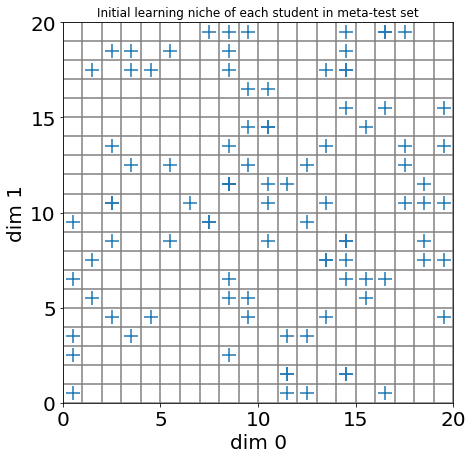

14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_1_k_7 with 1
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_2_k_7 with 2
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_3_k_7 with 3
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_4_k_7 with 4
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_5_k_7 with 5
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_10_k_7 with 10
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_25_k_7 with 25
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_50_k_7 with 50
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_75_k_7 with 75
14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_100_k_7 with 100


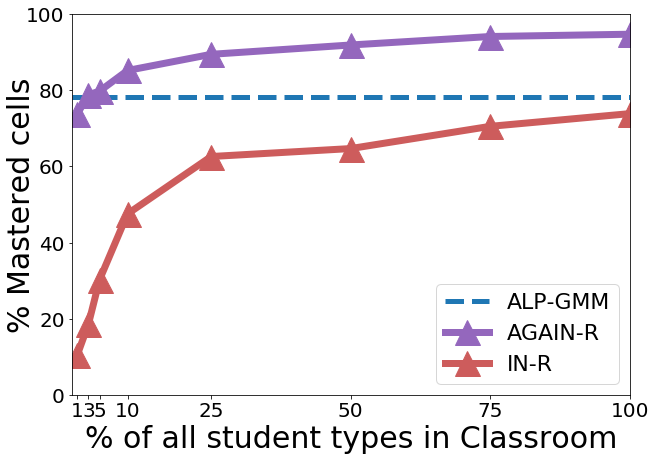

Ttest_indResult(statistic=3.712593849318079, pvalue=0.00034172339717593563)

In [277]:
# VARYING CLASSROOM SIZE EXPERIMENT
print(means_stats.keys())
ALPGMM_id = '19-06_toy_env_ns_v2_teacher_ALP-GMM_rnd_10'
AGAIN_head_id = "14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_"
IN_head_id = "14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_pt_1_cp_"
classroom_variants = [1,2,3,4,5,10,25,50,75,100]


# STEP - 0 Display test-time student sample
student_lists = []
start_cube_idx_lists = []
for i,(m_id,label) in enumerate(labels.items()):
    runs_data = models_saves[m_id]['data']
    print(m_id)
    student_list = []
    start_cube_idx_list = []
    for run in runs_data:  
        data = run['epochs_score']
        student_list.append((run['config']['seed'], run['config']['start_cube_idx']))
        start_cube_idx_list.append(run['config']['start_cube_idx'])
    student_lists.append(student_list) 
    start_cube_idx_lists.append(start_cube_idx_list)
print(sorted(student_lists[0], key=lambda tup: tup[0])[0:5])
print(sorted(student_lists[1], key=lambda tup: tup[0])[0:5])
# Plot them in 2D space
# get first cube index
x = np.arange(0,20,1)
y = np.arange(0,20,1)
all_cube_idxs = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))])
student_pos = np.array([np.array(all_cube_idxs[s_c_i]) for s_c_i in start_cube_idx_lists[-1]])
print(len(student_pos[:,0]))
plt.figure(figsize=(7,7))
ax = plt.gca()
# offset markers to center of cells
student_x = [v+0.5 for v in student_pos[:,0]]
student_y = [v+0.5 for v in student_pos[:,1]]
#plt.grid(color='b', linestyle='-', linewidth=2)
# ax.set_xticks(np.arange(21), minor=False)
# ax.set_yticks(np.arange(21), minor=False)
# ax.xaxis.grid(True, which='major')
# ax.yaxis.grid(True, which='major')
ax.scatter(student_x, student_y, marker='+', s=200,c=u'#1f77b4')
ax.set_xlim(left=0, right=20)
ax.set_ylim(bottom=0, top=20)
ax.set_xlabel('dim 0', fontsize=20)
ax.set_ylabel('dim 1', fontsize=20)
#add grid
#ax.tick_params(axis='both', which='major', labelsize=ticksize)
for i in range(21): 
    ax.axhline(i, linestyle='-', color='grey') # horizontal lines
    ax.axvline(i, linestyle='-', color='grey') # vertical lines
ax.locator_params(axis='x', nbins=5, fontsize=20)
ax.locator_params(axis='y', nbins=5, fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_title('Initial learning niche of each student in meta-test set')
plt.savefig("teachDRL/graphics/classroom/toy_env/sample_for_varying_classroom_size_expe.png",
            bbox_inches='tight', dpi=300)
plt.savefig("teachDRL/graphics/classroom/toy_env/sample_for_varying_classroom_size_expe.svg",
            bbox_inches='tight')
plt.savefig("teachDRL/graphics/classroom/toy_env/sample_for_varying_classroom_size_expe.pdf",
            bbox_inches='tight')
plt.show()
plt.close()

# STEP 1 - PLOT
plt.figure(figsize=(10,7))
ax = plt.gca()
#ax.locator_params(axis='x', nbins=5)
ax.locator_params(axis='y', nbins=5)
ax.set_xlabel('% of all student types in Classroom', fontsize=30)
ax.set_ylabel('% Mastered cells', fontsize=30,labelpad=-10)
ax.set_xlim(left=0, right=100)
ax.set_ylim(bottom=0, top=100)
ax.tick_params(axis='both', which='major', labelsize=20)
#first alpgmm dash line
plt.axhline(y=means_stats[ALPGMM_id], color=u'#1f77b4',
            linestyle='--', linewidth=5, label='ALP-GMM')

# construct line for AGAIN
d = []
for cv in classroom_variants:
    # find corresponding run
    for m_id,mean in means_stats.items():
        if AGAIN_head_id+str(cv)+'_' in m_id:
            print(m_id + ' with ' + str(cv))
            d.append([cv,mean])
            break

d = np.array(d[0:1]+d[2:3]+d[4:])
plt.plot(d[:,0],d[:,1],u'#9467bd', marker='^', markersize=25, label='AGAIN-R', linewidth=7)
# construct line for IN
d = []
for cv in classroom_variants:
    # find corresponding run
    for m_id,mean in means_stats.items():
        if IN_head_id+str(cv)+'_' in m_id:
            #print(m_id + ' with ' + str(cv))
            d.append([cv,mean])
            break
d = np.array(d[0:1]+d[2:3]+d[4:])
plt.plot(d[:,0],d[:,1],'indianred', marker='^', markersize=25, label='IN-R', linewidth=7)
plt.xticks(classroom_variants[0:1]+classroom_variants[2:3]+classroom_variants[4:])
plt.legend(fontsize=22)
# plt.title('Impact of classroom sparsity on Meta-ACL performances',fontsize=20)
# plt.savefig("teachDRL/graphics/classroom/toy_env/varying_classroom_size_expe.png",
#             bbox_inches='tight', dpi=300)
plt.savefig("teachDRL/graphics/classroom/toy_env/varying_classroom_size_expe.svg",
            bbox_inches='tight')
plt.savefig("teachDRL/graphics/classroom/toy_env/varying_classroom_size_expe.pdf",
            bbox_inches='tight')
plt.show()

get_welch(algo_0='14-07_toy_env_ns_v2_teacher_CEGT_expert_type_R_use_alpgmm_pt_1_sR_cp_10_k_7', algo_1='19-06_toy_env_ns_v2_teacher_ALP-GMM_rnd_10', verbose=False)

Creation of the directory teachDRL/graphics/classroom/toy_env//toy_env_ALP-GMM/ failed
toy_env_ALP-GMM
dict_keys(['config', 'env_params_train', 'env_train_rewards', 'epochs_score', 'epochs_comp_grid', 'teacher_update_comp_grid', 'epochs_episode_nb', 'time', 'ep_all_mastered', 'weights', 'covariances', 'means', 'tasks_alps', 'tasks_lps', 'episodes', 'tasks_origin'])
Creation of the directory teachDRL/graphics/classroom/toy_env//toy_env_ALP-GMM/ failed
seed: 0
0.013333333212411388
expert lp vals: [1.33333332e-002 6.30496347e-106 1.27278649e-027 2.38047807e-045
 1.59662806e-036]
250


FileNotFoundError: [Errno 2] No such file or directory: 'teachDRL/graphics/classroom/toy_env//toy_env_ALP-GMM//raws_0/ep250.png'

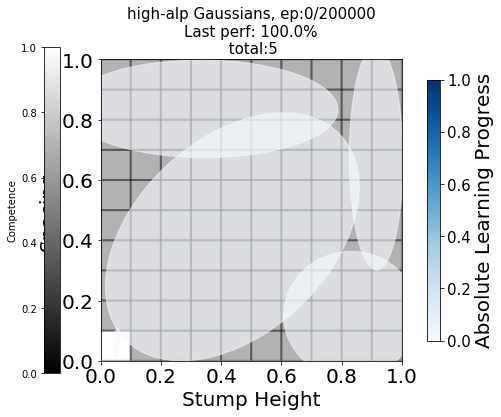

In [36]:
import matplotlib.patches as patches
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import matplotlib.colorbar as cbar
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.colors as colors
import teachDRL.teachers.utils.plot_utils as plotter
import importlib
import imageio
import os
importlib.reload(plotter)
folder = 'teachDRL/graphics/classroom/toy_env/'

def draw_competence_grid(ax, comp_grid, nb_cubes, bar=True):
    step_size = 1/nb_cubes
    bnds = [np.arange(0,1+step_size,step_size) for i in range(2)]
    x_bnds = bnds[0]
    y_bnds = bnds[1]
    comp_grid = comp_grid.astype(np.int64)
    #print(type(comp_grid[0][0]))
    #comp_grid[comp_grid == 100] = 1000
    #print(comp_grid)
    #np.transpose(comp_grid)
    ax.pcolor(x_bnds, y_bnds, comp_grid,cmap=plt.cm.gray, edgecolors='k', linewidths=2,
              alpha=0.3)
    if bar:
        cax, _ = cbar.make_axes(ax,location='left')
        cb = cbar.ColorbarBase(cax, cmap=plt.cm.gray)
        cb.set_label('Competence')
        cax.yaxis.set_ticks_position('left')
        cax.yaxis.set_label_position('left')

# PLOT GAUSSIAN TRAJECTORIES
def plot_gmm(means, covariances, ax=None, xlim=[0,1], ylim=[0,1], xlabel='Stump Height', ylabel='Spacing',
             bar=True, bar_side='right',no_y=False, color=None, title=None, nb_alpgmm=None):
    ft_off = 15
    #alps = means[:, -1]
    #means = means.tolist()
    ax = ax or plt.gca()
    mean_len = len(means)
    means_alpgmm = None
    if nb_alpgmm is not None: #remove alpgmm gaussians
        means_alpgmm = means[-nb_alpgmm:]
        means = means[:-nb_alpgmm]
        covariances_alpgmm = covariances[-nb_alpgmm:]
        covariances = covariances[:-nb_alpgmm]
        assert mean_len == (len(means_alpgmm) + len(means)), print('{},{},{}'.format(mean_len, len(means_alpgmm), len(means)))
    
    colors = [plt.cm.Blues(i) for i in means[:, -1]]
    colors_alpgmm = [plt.cm.Reds(i) for i in means[:, -1]]
    print('expert lp vals: {}'.format(means[:, -1]))
        

    nb_removed = 0
    for pos, covar, color in zip(means, covariances, colors):
        plotter.draw_ellipse(pos, covar, alpha=0.6, ax=ax, color=color)
    if means_alpgmm is not None:
        for pos, covar, color in zip(means_alpgmm, covariances_alpgmm, colors_alpgmm):
            plotter.draw_ellipse(pos, covar, alpha=0.6, ax=ax, color=color)

    #plt.margins(0, 0)
    if title != '':
        plt.title(title + '\n total:{}'.format(len(means)), fontsize=15)
    if bar:
        cax, _ = cbar.make_axes(ax, location=bar_side, shrink=0.8)
        cb = cbar.ColorbarBase(cax, cmap=plt.cm.Blues)
        cb.set_label('Absolute Learning Progress', fontsize=ft_off + 5)
        cax.tick_params(labelsize=ft_off + 0)
        cax.yaxis.set_ticks_position(bar_side)
        cax.yaxis.set_label_position(bar_side)
    #ax.yaxis.tick_right()
    if no_y:
        ax.set_yticks([])
    else:
        ax.set_ylabel(ylabel, fontsize=ft_off + 5)
        #ax.yaxis.set_label_position("right")
    ax.set_xlabel(xlabel, fontsize=ft_off + 5)
    ax.tick_params(axis='both', which='major', labelsize=ft_off + 5)
    ax.set_xlim(left=xlim[0], right=xlim[1])
    ax.set_ylim(bottom=ylim[0], top=ylim[1])
    ax.set_aspect('equal', 'box')

for i,(m_id,label) in enumerate(labels.items()):
    if 'ALP' in m_id:
        save_path = folder + '/' + m_id + '/'
        # create related folder
        try:
            os.mkdir(save_path)
        except OSError:
            print ("Creation of the directory %s failed" % save_path)
        else:
            print ("Successfully created the directory %s " % save_path)
        print(m_id)
        runs_data = models_saves[m_id]['data']
        for r,run in enumerate(runs_data):
            print(run.keys())
            raws_path = save_path+'/raws_{}'.format(run['config']['seed'])
            try:
                os.mkdir(raws_path)
            except OSError:
                print ("Creation of the directory %s failed" % save_path)
            else:
                print ("Successfully created the directory %s " % save_path)
                    #plt.show()
            images = []
            print('seed: {}'.format(run['config']['seed']))
    
            last_perf = round(run["epochs_score"][-1],1)
            max_perf = round(max(run["epochs_score"]),1)
            perf_str = "last:{}, max:{}".format(last_perf, max_perf)
            perf_title = "Last perf: {}%".format(last_perf, max_perf)
            means = [np.array(means) for means in run['means']]
            covs = [np.array(covs) for covs in run['covariances']]
            episodes = run['episodes']
            epochs_episodes = run['epochs_episode_nb']
            comp_grids = run['teacher_update_comp_grid'][1:]
            #print(comp_grids)
            #exp_idx = run['cegt_expert_idx']
            #exp_len = len(run['cegt_initial_expert_means'])
            #egt_nb_alpgmm_gaussians = run['cegt_nb_alpgmm_gaussians']
            ep_nb = 0
            #print(episodes)
            total_ep = episodes[-1]
            #print(comp_grids[-1])
            for j,(gmm_means, gmm_covs, ep) in enumerate(zip(means, covs, episodes)):
                plt.figure(figsize=(9,6))
                ax = plt.gca()
                #print(nb_alpgmm)
                #print(gmm_means)
                print(np.max(gmm_means[:,-1]))
                plot_gmm(gmm_means, gmm_covs, ax=ax, bar=True,
                         title='high-alp Gaussians, ep:{}/{}\n'.format(ep_nb, total_ep) + perf_title)
                print(ep)
                comp_grid = comp_grids[j].copy()
                #print(comp_grid[15:20][0:5])
                if np.min(comp_grid) < 0:
                    print('weirdgrid')
                    print(comp_grid)
                draw_competence_grid(ax, comp_grid, run['config']['nb_cubes'])
                plt.savefig(raws_path + '/' + 'ep{}'.format(ep), bbox_inches='tight')
                images.append(plotter.plt_2_rgb(ax))
                #plt.show()
                plt.close()
#                 if j >=0:
#                     break
                if ep_nb >= 50000:
                    break
                
                ep_nb += 250
            print("gifing...")
            if True: imageio.mimsave(save_path + m_id + '_{}.gif'.format(run['config']['seed']), images, duration=0.1)
            if r >=4:
                break
    if 'CEGT' in m_id and m_id == "10-06_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_gt_pt_0_sR":
        save_path = folder + '/' + m_id + '/'
        # create related folder
        try:
            os.mkdir(save_path)
        except OSError:
            print ("Creation of the directory %s failed" % save_path)
        else:
            print ("Successfully created the directory %s " % save_path)
        print(m_id)
        runs_data = models_saves[m_id]['data']
        for r,run in enumerate(runs_data):
            print(run.keys())
            raws_path = save_path+'/raws_{}'.format(run['config']['seed'])
            try:
                os.mkdir(raws_path)
            except OSError:
                print ("Creation of the directory %s failed" % save_path)
            else:
                print ("Successfully created the directory %s " % save_path)
                    #plt.show()
            images = []
            print('seed: {}'.format(run['config']['seed']))
    
            last_perf = round(run["epochs_score"][-1],1)
            max_perf = round(max(run["epochs_score"]),1)
            perf_str = "last:{}, max:{}".format(last_perf, max_perf)
            perf_title = "Last perf: {}%".format(last_perf, max_perf)
            means = [np.array(means) for means in run['cegt_means']]
            covs = [np.array(covs) for covs in run['cegt_covariances']]
            episodes = run['cegt_episodes']
            #epochs_episodes = run['epochs_episode_nb']
            comp_grids = run['teacher_update_comp_grid'][1:]
            print(len(comp_grids))
            exp_idx = run['cegt_expert_idx']
            exp_len = len(run['cegt_initial_expert_means'])
            cegt_nb_alpgmm_gaussians = run['cegt_nb_alpgmm_gaussians']
            #egt_nb_alpgmm_gaussians = run['cegt_nb_alpgmm_gaussians']
            ep_nb = 0
            #print(episodes)
            total_ep = episodes[-1]
            #print(comp_grids[-1])
            starting_episode = 92000
            s_idx = 0  # start_idx
            for k,ep in enumerate(episodes):
                if ep >= starting_episode:
                    s_idx = k
                    break
            for j,(gmm_means, gmm_covs, ep, e_idx, nb_alpgmm) in enumerate(zip(means[s_idx:], covs[s_idx:],
                                                                    episodes[s_idx:], exp_idx[s_idx:],
                                                                   cegt_nb_alpgmm_gaussians[s_idx:])):
                plt.figure(figsize=(9,6))
                ax = plt.gca()
                #print(nb_alpgmm)
                #print(gmm_means)
                print(np.max(gmm_means[:,-1]))
                plot_gmm(gmm_means, gmm_covs, ax=ax, bar=True,
                         title='high-alp Gaussians, ep:{}/{}, e_idx:{}/{} \n'.format(ep, total_ep, e_idx, exp_len) + perf_title,
                        nb_alpgmm=nb_alpgmm)
                print(ep)
                #WARNIIIIIIIIIIIIIIIIIIIIIIIIING comp_grid = comp_grids[j].copy()
#                 if np.min(comp_grid) < 0:
#                     print('weirdgrid')
#                     print(comp_grid)
                comp_grid = run['epochs_comp_grid'][0].copy()
                # WARNING SHITTY COMP GRID TODO FELIX
                draw_competence_grid(ax, comp_grid, run['config']['nb_cubes'])
                plt.savefig(raws_path + '/' + 'ep{}'.format(ep), bbox_inches='tight')
                images.append(plotter.plt_2_rgb(ax))
                #plt.show()
                plt.close()
#                 if j >=0:
#                     break
                if ep_nb >= 50000:
                    break
                
                ep_nb += 250
            print("gifing...")
            if False: imageio.mimsave(save_path + m_id + '_{}.gif'.format(run['config']['seed']), images, duration=0.1)
            if r >=4:
                break
    
    #if 'EGT' in m_id and m_id=='EGTcshortR_alpgmm_d-deco_10rlen_100tolr_03-03':#"EGTcshorthmn_alpgmm_05-02":
#     if m_id == '28-04_CGT_leg_s_0.20_walk_t_0_expert_type_R_k_3_pt_2':
#         save_path = folder + '/' + m_id + '/'
#         # create related folder
#         try:
#             os.mkdir(save_path)
#         except OSError:
#             print ("Creation of the directory %s failed" % save_path)
#         else:
#             print ("Successfully created the directory %s " % save_path)
#         print(m_id)
#         runs_data = models_saves[m_id]['data']
#         for r,run in enumerate(runs_data):
#             raws_path = save_path+'/raws_{}'.format(run['config']['seed'])
#             try:
#                 os.mkdir(raws_path)
#             except OSError:
#                 print ("Creation of the directory %s failed" % save_path)
#             else:
#                 print ("Successfully created the directory %s " % save_path)
#                     #plt.show()
#             images = []
#             print('seed: {}'.format(run['config']['seed']))
    
#             last_perf = round(run["nb_mastered"][-1],1)
#             max_perf = round(max(run["nb_mastered"]),1)
#             perf_str = "last:{}, max:{}".format(last_perf, max_perf)
#             perf_title = "Last perf: {}% | Max perf: {}%".format(last_perf, max_perf)
#             egt_means = [np.array(means) for means in run['cegt_means']]
#             #print(type(egt_covs[0]))
#             #print(type(run['covariances'][0]))
#             egt_covs = [np.array(covs) for covs in run['cegt_covariances']]
#             egt_episodes = run['cegt_episodes']
#             exp_idx = run['cegt_expert_idx']
#             #print((run['egt_initial_expert_means'][0]))
#             #print((run['egt_means'][0]))
#             #print(len(run['egt_initial_expert_means']))
#             exp_len = len(run['cegt_initial_expert_means'])
#             egt_nb_alpgmm_gaussians = run['cegt_nb_alpgmm_gaussians']
#             episodes = egt_episodes
#             step_nb = 0
#             ep_nb = 0
#             print(episodes)
#             total_ep = len(run['env_train_len'])
#             for j,(gmm_means, gmm_covs, ep, e_idx, nb_alpgmm)\
#             in enumerate(zip(egt_means, egt_covs,egt_episodes, exp_idx, egt_nb_alpgmm_gaussians)):
#                 step_nb += sum(run['env_train_len'][last_ep:ep])
#                 last_ep = ep
#                 plt.figure(figsize=(5,7))
#                 ax = plt.gca()
#                 #print(nb_alpgmm)
#                 #print(gmm_means)
#                 plot_gmm(gmm_means, gmm_covs, ax=ax, bar=True, nb_alpgmm=nb_alpgmm,
#                          title='high-alp Gaussians, ep:{}/{}, e_idx:{}/{} \n'.format(ep, total_ep, e_idx, exp_len) + perf_title)
#                 plt.savefig(raws_path + '/' + 'ep{}'.format(ep), bbox_inches='tight')
#                 images.append(plotter.plt_2_rgb(ax))
#                 #plt.show()
#                 plt.close()
# #                 if j >=0:
# #                     break
#                 if step_nb > 10000000:
#                     break
#             print("gifing...")
#             if True: imageio.mimsave(save_path + m_id + '_{}.gif'.format(run['config']['seed']), images, duration=0.4)
#             if r >=10:
#                 break
#[array([0.44808081, 5.03414103, 0.21193255]), array([0.15930298, 1.93195801, 0.23225757])]     

In [ ]:
for i,(m_id,label) in enumerate(labels.items()):
    runs_data = models_saves[m_id]['data']
    for r,run in enumerate(runs_data):
        print('seed: {}, rot: {}, min_grid_v: {}'.format(run['config']['seed'], run['config']['nb_rot'],
                                                        np.min(run['teacher_update_comp_grid'])))
        
#         print(np.max([np.max(v) for v in run['means']))
#         print(run['means'][100000:100050,2])


In [13]:
# PLOT EVOLUTION OF TASK ORIGIN IN CEGT RUNS
#print(labels.keys())
for i,(m_id,label) in enumerate(labels.items()):
    if m_id != '15-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR': #
         continue
    nb_not_finished = 0
    print(m_id)
    runs_data = models_saves[m_id]['data']
    print(len(runs_data))
    all_alpgmm_tasks_percentage = []
    expert_identifier = []
    rots_not_finished = [0,0,0,0]
    rots_all = [0,0,0,0]
    for r,run in enumerate(runs_data):
        expert_identifier.append(np.round(run['cegt_initial_expert_means'][40][0][0],2))
        rots_all[run['config']['nb_rot']] += 1
        nb_egt_updates = len(run['cegt_episodes'])
        #print(len(run['cegt_episodes']))
        print(run['cegt_episodes'][0:15])
        print(run['cegt_episodes'][-10:])
#         print(run['egt_means'][0])
#         print(run['egt_means'][1])
        origins = run['cegt_tasks_origin']
        expert_mean_rewards = run['cegt_initial_expert_mean_rewards']
        assert(len(expert_mean_rewards) == len(run['cegt_initial_expert_means']))
        print(expert_mean_rewards[662])
        alpgmm_tasks_percentage = []
        idx = 1
        step = 250
        unique, counts = np.unique(run['cegt_tasks_origin'], return_counts=True)
        print("s:{}, nb_ups:{}, d:{} expert_completion:{}/{}".format(run['config']['seed'],
                            nb_egt_updates, dict(zip(unique, counts)),
                            run['cegt_expert_idx'][-1],len(run['cegt_initial_expert_means'])-1))
        while idx < len(origins):
            # get percentage of tasks from alpgmm in current 1000 episode chunk
            unique, counts = np.unique(run['cegt_tasks_origin'][idx:idx+step], return_counts=True)
            d = dict(zip(unique, counts))
            if 'egt' not in d:
                d['egt'] = 0
            if 'alpgmm' not in d:
                d['alpgmm'] = 0
            alpgmm_tasks_percentage.append(d['alpgmm'] / (d['egt']+d['alpgmm']))
            idx += step
        all_alpgmm_tasks_percentage.append(alpgmm_tasks_percentage)
        print('expert list len= {}'.format(len(run['cegt_initial_expert_means'])))
        print(run['cegt_expert_idx'][-10:])
        if run['cegt_expert_idx'][-1] != (len(run['cegt_initial_expert_means'])-1):
            nb_not_finished += 1
            rots_not_finished[run['config']['nb_rot']] += 1
        #plt.figure()
        #r = [plt.plot(l) for l in all_alpgmm_tasks_percentage]
        #plt.plot(alpgmm_tasks_percentage)
        #ax = plt.gca()
        #ax.set_xlim(left=0,right=5)
        #ax.set_ylim(top=1, bottom=0)
        #plt.show()
for l in all_alpgmm_tasks_percentage:
    plt.figure()
    plt.plot(l)
    
# plt.plot(np.mean(r))
# ax = plt.gca()
# #ax.set_xlim(left=0,right=5)
# ax.set_ylim(top=1, bottom=0)
# plt.savefig('shortRtrajs.png')
# plt.show()
print('not finito: '+ str(nb_not_finished))
print(expert_identifier)
print(rots_not_finished)
print(rots_all)

15-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR
48


KeyError: 'cegt_initial_expert_means'

odict_keys(['17-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR', '23-07_final_toy_env_vizu_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR'])
23-07_final_toy_env_vizu_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR
48
dict_keys(['config', 'env_params_train', 'env_train_rewards', 'epochs_score', 'epochs_comp_grid', 'teacher_update_comp_grid', 'epochs_episode_nb', 'time', 'ep_all_mastered', 'cegt_k', 'cegt_pt', 'cegt_expert_type', 'cegt_cf', 'cegt_rap', 'stop_R', 'cegt_covariances', 'cegt_means', 'cegt_episodes', 'cegt_tasks_origin', 'cegt_nb_alpgmm_gaussians', 'cegt_expert_idx', 'cegt_test_vectors', 'pre_test_vec', 'selected_expert', 'stoppedR_episode', 'cegt_initial_expert_means', 'cegt_initial_expert_covs', 'cegt_student_param', 'cegt_initial_expert_mean_rewards', 'weights', 'covariances', 'means', 'tasks_alps', 'tasks_lps', 'episodes', 'tasks_origin'])
0.9414
s:405, nb_ups:800, d:{'alpgmm': 124694, 'egt': 69443, 'random': 5864} expert_completion:795/795
expert list len= 7

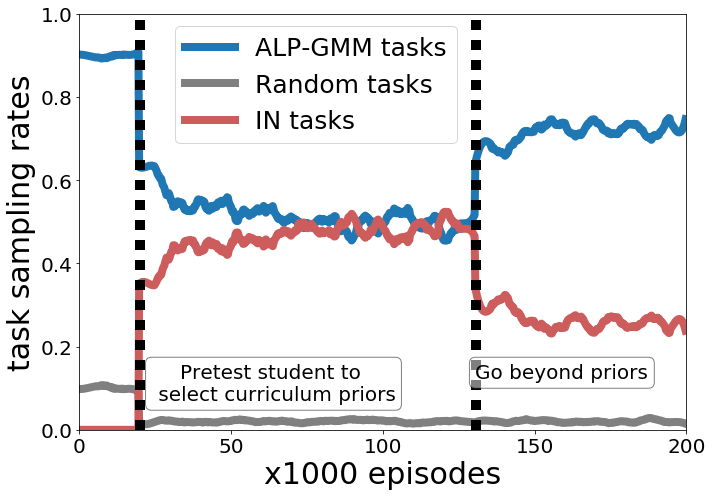

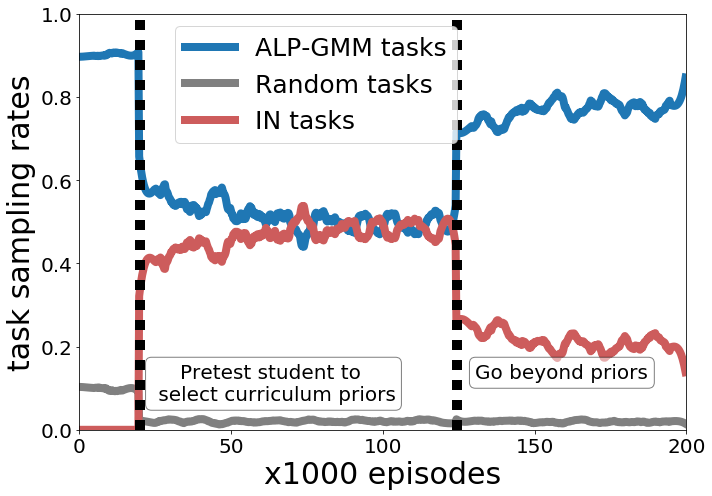

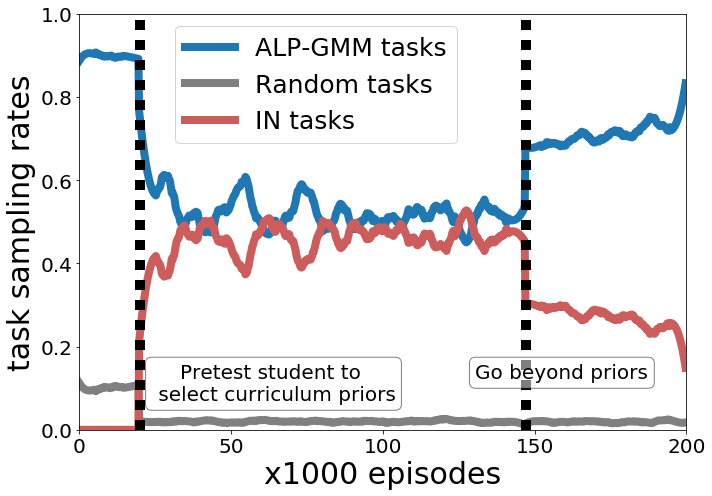

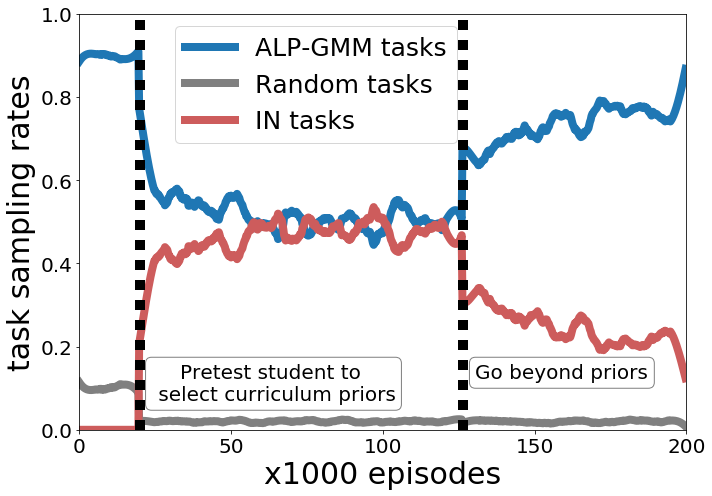

In [226]:
from scipy.signal import savgol_filter

# CORL 2020 FIGURES - EXAMPLE OF AGAIN CURRICULUM
def moving_avg(a, n=3) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

print(labels.keys())
for i,(m_id,label) in enumerate(labels.items()):
#     if m_id != '17-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR': #
#          continue
    if m_id != '23-07_final_toy_env_vizu_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR': #
         continue
    nb_not_finished = 0
    print(m_id)
    runs_data = models_saves[m_id]['data']
    print(len(runs_data))
    all_alpgmm_tasks_percentage = []
    expert_identifier = []
    rots_not_finished = [0,0,0,0]
    rots_all = [0,0,0,0]
    for r,run in enumerate(runs_data):
        if r > 3:
            continue
        print(run.keys())
        #expert_identifier.append(np.round(run['cegt_initial_expert_means'][40][0][0],2))
        rots_all[run['config']['nb_rot']] += 1
        nb_egt_updates = len(run['episodes'])
        #print(len(run['cegt_episodes']))
        #print(run['cegt_episodes'][0:15])
        #print(run['cegt_episodes'][-10:])
#         print(run['egt_means'][0])
#         print(run['egt_means'][1]
        origins = run['cegt_tasks_origin']
        expert_mean_rewards = run['cegt_initial_expert_mean_rewards']
        last_expert_idx = len(run['cegt_initial_expert_means'])-1
        assert(len(expert_mean_rewards) == len(run['cegt_initial_expert_means']))
        print(expert_mean_rewards[662])
        alpgmm_tasks_percentage = []
        cegt_tasks_percentage = []
        random_tasks_percentage = []
        idx = 0
        step = 250
        unique, counts = np.unique(run['cegt_tasks_origin'], return_counts=True)
        print("s:{}, nb_ups:{}, d:{} expert_completion:{}/{}".format(run['config']['seed'],
                            nb_egt_updates, dict(zip(unique, counts)),
                            run['cegt_expert_idx'][-1],len(run['cegt_initial_expert_means'])-1))
        episodes = []
        while idx < len(origins):
            # get percentage of tasks from alpgmm in current 1000 episode chunk
            unique, counts = np.unique(run['cegt_tasks_origin'][idx:idx+step], return_counts=True)
            d = dict(zip(unique, counts))
            if 'egt' not in d:
                d['egt'] = 0
            if 'alpgmm' not in d:
                d['alpgmm'] = 0
            if 'random' not in d:
                d['random'] = 0
            total = d['egt']+d['alpgmm']+d['random']
            alpgmm_tasks_percentage.append(d['alpgmm'] / total)
            cegt_tasks_percentage.append(d['egt'] / total)
            random_tasks_percentage.append(d['random'] / total)
            episodes.append(idx)
            idx += step
        #print(episodes)
        all_alpgmm_tasks_percentage.append(alpgmm_tasks_percentage)
        print('expert list len= {}'.format(len(run['cegt_initial_expert_means'])))
        #print(run['cegt_expert_idx'][-10:])
        if run['cegt_expert_idx'][-1] != (len(run['cegt_initial_expert_means'])-1):
            nb_not_finished += 1
            rots_not_finished[run['config']['nb_rot']] += 1
        
        plt.figure(figsize=(10,7))
        ax = plt.gca()
        ax.set_ylim(top=1, bottom=0)
        ax.locator_params(axis='x', nbins=5)
        ax.locator_params(axis='y', nbins=5)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.set_xlabel('x1000 episodes', fontsize=30)
        ax.set_ylabel("task sampling rates", fontsize=30)
        
        # apply moving average to data but separates chunks by pre-train / train with AGAIN / IN done
        #print(cegt_tasks_percentage)
        pretest_idx = (np.array(cegt_tasks_percentage)!=0).argmax(axis=0)
        print('pretest_idx:{}'.format(pretest_idx))
        #in_done_idx = (np.array(cegt_tasks_percentage[pretest_idx:])==0).argmax(axis=0) + pretest_idx
        in_done_idx = None
        if last_expert_idx in run['cegt_expert_idx']:  # IN was finished
            in_done_idx = (np.array(run['cegt_expert_idx']) == last_expert_idx).argmax(axis=0)
        in_done_ep = run['cegt_episodes'][in_done_idx + 1]  #+1 because cegt_episodes has ep 0
        in_done_idx = int(round(in_done_ep / step)) # avg to closest idx
        print('last in idx reached at {}'.format(in_done_ep))
        print(len(run['cegt_episodes']))
        print(len(run['cegt_expert_idx']))
        assert(len(run['cegt_episodes'])-1 == len(run['cegt_expert_idx']))

        #AG_data = moving_avg(,n=5)
        raw_vizu_d = [alpgmm_tasks_percentage,random_tasks_percentage,cegt_tasks_percentage]

        vizu_d = []
        print('pretest_idx:{}, in_done_ep:{}, which is idx {}'.format(pretest_idx,in_done_ep, in_done_idx))
        n = 41
# MOVING AVERAGE
#         for raw_d in raw_vizu_d:
#             d = moving_avg(raw_d[:pretest_idx],n=n).tolist() +\
#                 moving_avg(raw_d[pretest_idx:in_done_idx],n=n).tolist() +\
#                 moving_avg(raw_d[in_done_idx:],n=n).tolist()
#             vizu_d.append(d)
# SVASKY FILTER
        for i,raw_d in enumerate(raw_vizu_d):
            d = savgol_filter(raw_d[1:pretest_idx], n, 3).tolist() +\
                savgol_filter(raw_d[pretest_idx:in_done_idx], n, 3).tolist() +\
                savgol_filter(raw_d[in_done_idx:], n, 3).tolist()
            vizu_d.append(d)
            #if i==2: print(raw_d[in_done_idx:])
            #assert(len(d) == len(raw_d)), print(str(len(d))+' raw: '+str(len(raw_d)))
            
        
#         a = np.array(a)
# (a!=0).argmax(axis=0)
# Out[6]: 3
# (a[3:]==0).argmax(axis=0)
        pretest_len = 20
        plt.plot(vizu_d[0], color=u'#1f77b4',label='ALP-GMM tasks',linewidth=8)
        plt.plot(vizu_d[1], color='grey',label='Random tasks',linewidth=8)
        plt.plot(vizu_d[2], color='indianred',label='IN tasks',linewidth=8)
        #labs = [item.get_text() for item in ax.get_xticklabels()]
        #print(labs)
        #labs = [0,50,100,150,200]
        #ax.set_xticklabels(labs)
        ax.set_xlim(xmin=0,xmax=800)
        ax.set_ylim(bottom=0,top=1)
        vals,_ = plt.xticks()
        #print(vals)
        plt.xticks(ticks=vals,labels=[int(v/4) for v in vals])
        
        # add phase lines
        plt.axvline(pretest_idx, 0, 1, linewidth=10,color='black',linestyle=(0,(1,1)))
        plt.axvline(in_done_idx, 0, 1, linewidth=10,color='black',linestyle=(0,(1,1)))
        
        # ADD TEXT BOXES
        pretest_textstr = 'Pretest student to \n select curriculum priors'
        postin_textstr = 'Go beyond priors'

        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        # place a text box in upper left in axes coords
        ax.text(0.32, 0.16, pretest_textstr, transform=ax.transAxes, fontsize=20,
                verticalalignment='top', ha='center', bbox=props)
        ax.text(0.795, 0.16, postin_textstr, transform=ax.transAxes, fontsize=20,
                verticalalignment='top', ha='center', bbox=props)

        plt.legend(fontsize=25,loc='upper center',bbox_to_anchor=(0.39,1.0))
        plt.tight_layout()
        plt.savefig('teachDRL/graphics/classroom/toy_env/AGAIN_curr_vizu/vizu_AGAIN_toy{}.png'.format(r))
        plt.savefig('teachDRL/graphics/classroom/toy_env/AGAIN_curr_vizu/vizu_AGAIN_toy{}.pdf'.format(r))
        plt.savefig('teachDRL/graphics/classroom/toy_env/AGAIN_curr_vizu/vizu_AGAIN_toy{}.svg'.format(r))
print('not finito: '+ str(nb_not_finished))
print(rots_not_finished)
print(rots_all)

In [ ]:
###################### PLOT VISU OF SELECTED STUDENT IN CLASSROOM IN IN APPROACHES ######################
from sklearn.neighbors import NearestNeighbors
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


# def get_k_experts(current_student_param, current_test_vec, initial_test_vec_history, last_test_vec_history,
#                   student_id_history, student_params, last_perfs, k=5, test_vec_idx=1,
#                   use_ground_truth=False, is_toy_env=False, visu=True, current_visu_info=None):
#     #print('test veccc {}'.format(current_student_param))
#     if use_ground_truth:
#         # build the student dataset with only identical morphologies
#         student_param_history = []
#         original_student_idx = []
#         #print(is_toy_env)
#         if is_toy_env:
#             for i, nb_rot in enumerate(zip(student_params['nb_rot'])):
#                 student_param_history.append(nb_rot)
#                 original_student_idx.append(i)
#         else:
#             is_current_student_quad = current_student_param[1] >= 0.5
#             for i, (leg_s, is_quad) in enumerate(zip(student_params['leg_s'], student_params['is_quad'])):
#                 if is_current_student_quad == is_quad:  # new student and this old one have same morpho
#                     student_param_history.append(leg_s)
#                     original_student_idx.append(i)
#         # fit and retrieve top previously trained closest student
#         student_param_history = np.array(student_param_history).astype(np.float32).reshape(-1, 1)
#         nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(student_param_history)
#         dist, idx = nbrs.kneighbors(np.array(current_student_param[0]).reshape(-1, 1))
#         # map knn indices to original indexing
#         og_idx = []
#         # print(idx)
#         for i in idx[0]:
#             og_idx.append(original_student_idx[i])
#         idx = [og_idx]
#     else:
#         #initial_test_vec_history = np.stack([np.array(vec) for vec in initial_test_vec_history], axis=0)
#         initial_test_vec_history = np.array(initial_test_vec_history[test_vec_idx]).astype(np.float32)
#         current_test_vec = np.array(current_test_vec)
#         nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(initial_test_vec_history)
#         dist, idx = nbrs.kneighbors(np.array(current_test_vec).reshape(1,-1))
#     dist = np.round(dist, 4)
#     scores = []
#     for i, idxx in enumerate(idx[0]):
#         scores.append(np.round(sum(last_test_vec_history[idxx]),2))
#     max_idx = np.argmax(scores)
#     for i, idxx in enumerate(idx[0]):
#         if i == max_idx:
#             print('{}={}, dist: {}, score: {} stud_params:{}!!!!!!!!!!!!!!!!!!!!!'.format(student_id_history[idxx][14:],
#                                                                             last_perfs[idxx],
#                                                                             dist[0][i], scores[i], student_params['nb_rot'][idxx]))
#         else:
#             print('{}={}, dist: {}, score: {} stud_params:{}'.format(student_id_history[idxx][14:], last_perfs[idxx],
#                                                       dist[0][i], scores[i], student_params['nb_rot'][idxx]))
    
#     if visu:
#         nb_rot, last_perf = current_visu_info
#         plt.figure(figsize=(10,7))
#         ax = plt.gca()
        
#         c_map = truncate_colormap(plt.cm.Blues, minval=0.4, maxval=1.0)
#         if use_ground_truth:
#             initial_test_vec_history = np.array(initial_test_vec_history[test_vec_idx]).astype(np.float32)
#         # STEP 1 - PLOT PCA on pretest_data:
#         pca_dims = 2
#         pca = PCA(n_components=pca_dims)
#         pca.fit(initial_test_vec_history)
#         #print(pca.explained_variance_ratio_)
#         pca_student_pretest_history = pca.transform(initial_test_vec_history)
#         # plot PCA

#         def_shapes = ['v','^','>','<']
#         colors = [def_colors[i] for i in student_nb_rot]
#         v_min = np.min(last_perfs)
#         v_max = np.max(last_perfs)
#         normalized_last_perfs = np.interp(last_perfs,(v_min,v_max),(0,1)).copy()
#         colors = [c_map(perf) for perf in normalized_last_perfs]


#         shapes = [def_shapes[i] for i in student_params['nb_rot']]
#         for i,(pca_0,pca_1,color,shape) in enumerate(zip(pca_student_pretest_history[:,0],
#                                                          pca_student_pretest_history[:,1],
#                                                          colors,
#                                                          shapes)):
#             plt.scatter(pca_0, pca_1, color=color, marker=shape, s=50)
#         title = "PCA of competence vector after {} training epochs".format(comp_grid_idx)
#         ax.set_title(title, fontsize=15)
#         ax.set_xlabel('pca dim 0', fontsize=15)
#         ax.set_ylabel('pca dim 1', fontsize=15)

#         # make bar
#         cax, _ = cbar.make_axes(ax, location='right', shrink=0.9)
#         cb = cbar.ColorbarBase(cax, cmap=c_map)
#         cb.set_label('Normalized student end perfs', fontsize=15)
#         ax.set_ylim(ax.get_ylim())
#         ax.set_xlim(ax.get_xlim())
            
#         # STEP 2 - ADD NEW STUDENT AND DISPLAY SELECTION PROCESS
 

#         # add considered previously trained student's
#         for i, idxx in enumerate(idx[0]):
#             color = c_map(np.interp(last_perfs[idxx],(v_min,v_max),(0,1)))
#             print(last_perfs[idxx])
#             nb_rot = student_params['nb_rot'][idxx]
#             shape = def_shapes[nb_rot]
#             pca_0 = pca_student_pretest_history[idxx,0]
#             pca_1 = pca_student_pretest_history[idxx,1]
#             # re-draw original
#             ax.scatter(pca_0, pca_1, marker=shape, s=100,c=color,linewidths=2.0, edgecolors='red')
#             if i == max_idx:
#                 ax.scatter(pca_0, pca_1, marker=shape, s=100,c=color,linewidths=2.0, edgecolors='chocolate')
#                 # add labels
#                 ax.scatter(-10000, -10000, marker=shape, s=400,c='none',linewidths=3.5,
#                            edgecolors='red',label='considered')
#                 ax.scatter(-10000, -10000, marker=shape, s=400,c=color,linewidths=3.5,
#                            edgecolors='chocolate',label='selected')
#         # add considered condition
#         new_stud_shape = def_shapes[nb_rot]
#         color = c_map(np.interp(last_perf,(v_min,v_max),(0,1)))
#         pca_new_stud = pca.transform(current_test_vec.flatten().reshape(1,-1))[0,:]
#         #print(pca_new_stud.shape)
#         ax.scatter(pca_new_stud[0], pca_new_stud[1], marker=new_stud_shape, s=100,c=color,linewidths=2.0,
#                            edgecolors='darkviolet')
#         ax.scatter(-10000, -10000, marker=new_stud_shape, s=400,c=color,linewidths=3.5,
#                    edgecolors='darkviolet',label='new student')
        
        
#         leg_args = {'ncol':2,
#                                 'columnspacing':1.0,
#                                 'handlelength':1.0,
#                                 'frameon':False,
#                                'labelspacing':0.2}
#         ax.legend()
#         ax.set_title("Selection of learning priors for a new student", fontsize=15)
#         ax.legend(loc='auto', fontsize=20, **leg_args)
        
#         if True:
#             ## ADD ZOOMING
#             per_rot_zoom = [(-200, -120, -50, 50),(-280, -150, -500, -330),
#                             (430, 630, -70, 40),(-250, -150, 250, 430)]
#             locs = [(2,4),(2,4),(2,4),(1,3)]
#             locloc = [8,4,4,8]
#             growth_f = [3.5,3.5,3.5,3.5]
#             g = growth_f[nb_rot]

#             axins = zoomed_inset_axes(ax, g, loc=locloc[nb_rot])
#             x1, x2, y1, y2 = per_rot_zoom[nb_rot] # specify the limits
#             axins.set_xlim(x1, x2) # apply the x-limits
#             axins.set_ylim(y1, y2) # apply the y-limits
#             plt.yticks(visible=False)
#             plt.xticks(visible=False)
#             loc1, loc2 = locs[nb_rot]
#             mark_inset(ax, axins, loc1=loc1, loc2=loc2, fc="none", ec="0.5")
            
#             # re-draw classroom data
#             for i,(pca_0,pca_1,color,shape) in enumerate(zip(pca_student_pretest_history[:,0],
#                                                  pca_student_pretest_history[:,1],
#                                                  colors,
#                                                  shapes)):
#                 plt.scatter(pca_0, pca_1, color=color, marker=shape, s=50*g)
            
#             # re-add considered previously trained student's
#             for i, idxx in enumerate(idx[0]):
#                 color = c_map(np.interp(last_perfs[idxx],(v_min,v_max),(0,1)))
#                 nb_rot = student_params['nb_rot'][idxx]
#                 shape = def_shapes[nb_rot]
#                 pca_0 = pca_student_pretest_history[idxx,0]
#                 pca_1 = pca_student_pretest_history[idxx,1]
#                 # re-draw original
#                 axins.scatter(pca_0, pca_1, marker=shape, s=100*g,c=color,linewidths=2.5, edgecolors='red')
#                 if i == max_idx:
#                     axins.scatter(pca_0, pca_1, marker=shape, s=100*g,c=color,linewidths=2.5, edgecolors='chocolate')
#             # add considered condition
#             new_stud_shape = def_shapes[nb_rot]
#             color = c_map(np.interp(last_perf,(v_min,v_max),(0,1)))
#             pca_new_stud = pca.transform(current_test_vec.flatten().reshape(1,-1))[0,:]
#             #print(pca_new_stud.shape)
#             axins.scatter(pca_new_stud[0], pca_new_stud[1], marker=new_stud_shape, s=100*g,c=color,linewidths=2.5,
#                                edgecolors='darkviolet')
        
        
#     return student_id_history[idx[0][max_idx]]


def get_k_experts(current_student_param, current_test_vec, initial_test_vec_history, last_test_vec_history,
                  student_id_history, student_params, last_perfs, k=5, test_vec_idx=1,
                  use_ground_truth=False, is_toy_env=False, is_v2=False,visu=True, current_visu_info=None):
    #print('test veccc {}'.format(current_student_param))

    stud_param_name = None
    if is_toy_env and is_v2:
        stud_param_name = 'start_cube_idx'
    if is_toy_env and not is_v2:
        stud_param_name = 'nb_rot'
    if use_ground_truth:
        # build the student dataset with only identical morphologies
        student_param_history = []
        original_student_idx = []
        print(is_toy_env)
        if is_toy_env:
            for i, stud_param in enumerate(zip(student_params[stud_param_name])):
                if stud_param[0] == current_student_param[0]:
                    student_param_history.append(stud_param)
                    original_student_idx.append(i)
        else:
            is_current_student_quad = current_student_param[1] >= 0.5
            for i, (leg_s, is_quad) in enumerate(zip(student_params['leg_s'], student_params['is_quad'])):
                if is_current_student_quad == is_quad:  # new student and this old one have same morpho
                    student_param_history.append(leg_s)
                    original_student_idx.append(i)
        # fit and retrieve top previously trained closest student
        student_param_history = np.array(student_param_history).astype(np.float32).reshape(-1, 1)
        n_neighbors = min(k,len(student_param_history))
        if n_neighbors != k: print('reducing k to {} because not enough students in classroom'.format(k))
        nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(student_param_history)
        dist, idx = nbrs.kneighbors(np.array(current_student_param[0]).reshape(-1, 1))
        # map knn indices to original indexing
        og_idx = []
        # print(idx)
        for i in idx[0]:
            og_idx.append(original_student_idx[i])
        idx = [og_idx]
    else:
        #initial_test_vec_history = np.stack([np.array(vec) for vec in initial_test_vec_history], axis=0)
        initial_test_vec_history = np.array(initial_test_vec_history[test_vec_idx]).astype(np.float32)
        current_test_vec = np.array(current_test_vec)
        nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(initial_test_vec_history)
        dist, idx = nbrs.kneighbors(np.array(current_test_vec).reshape(1,-1))
    dist = np.round(dist, 4)
    scores = []
    for i, idxx in enumerate(idx[0]):
        scores.append(np.round(sum(last_test_vec_history[idxx]),2))
    max_idx = np.argmax(scores)
    for i, idxx in enumerate(idx[0]):
        if i == max_idx:
            print('{}={}, dist: {}, score: {} stud_params:{}!!!!!!!!!!!!!!!!!!!!!'.format(student_id_history[idxx][14:],
                                                                            last_perfs[idxx],
                                                                            dist[0][i], scores[i], student_params[stud_param_name][idxx]))
        else:
            print('{}={}, dist: {}, score: {} stud_params:{}'.format(student_id_history[idxx][14:], last_perfs[idxx],
                                                      dist[0][i], scores[i], student_params[stud_param_name][i]))
    if visu:
        nb_rot, last_perf = current_visu_info
        plt.figure(figsize=(10,7))
        ax = plt.gca()
        
        c_map = truncate_colormap(plt.cm.Blues, minval=0.4, maxval=1.0)
        if use_ground_truth:
            initial_test_vec_history = np.array(initial_test_vec_history[test_vec_idx]).astype(np.float32)
        # STEP 1 - PLOT PCA on pretest_data:
        pca_dims = 2
        pca = PCA(n_components=pca_dims)
        pca.fit(initial_test_vec_history)
        #print(pca.explained_variance_ratio_)
        pca_student_pretest_history = pca.transform(initial_test_vec_history)
        # plot PCA

        def_shapes = ['v','^','>','<']
        colors = [def_colors[i] for i in student_nb_rot]
        v_min = np.min(last_perfs)
        v_max = np.max(last_perfs)
        normalized_last_perfs = np.interp(last_perfs,(v_min,v_max),(0,1)).copy()
        colors = [c_map(perf) for perf in normalized_last_perfs]


        shapes = [def_shapes[i] for i in student_params['nb_rot']]
        for i,(pca_0,pca_1,color,shape) in enumerate(zip(pca_student_pretest_history[:,0],
                                                         pca_student_pretest_history[:,1],
                                                         colors,
                                                         shapes)):
            plt.scatter(pca_0, pca_1, color=color, marker=shape, s=50)
        title = "PCA of competence vector after {} training epochs".format(comp_grid_idx)
        ax.set_title(title, fontsize=15)
        ax.set_xlabel('pca dim 0', fontsize=15)
        ax.set_ylabel('pca dim 1', fontsize=15)

        # make bar
        cax, _ = cbar.make_axes(ax, location='right', shrink=0.9)
        cb = cbar.ColorbarBase(cax, cmap=c_map)
        cb.set_label('Normalized student end perfs', fontsize=15)
        ax.set_ylim(ax.get_ylim())
        ax.set_xlim(ax.get_xlim())
            
        # STEP 2 - ADD NEW STUDENT AND DISPLAY SELECTION PROCESS
 

        # add considered previously trained student's
        for i, idxx in enumerate(idx[0]):
            color = c_map(np.interp(last_perfs[idxx],(v_min,v_max),(0,1)))
            print(last_perfs[idxx])
            nb_rot = student_params['nb_rot'][idxx]
            shape = def_shapes[nb_rot]
            pca_0 = pca_student_pretest_history[idxx,0]
            pca_1 = pca_student_pretest_history[idxx,1]
            # re-draw original
            ax.scatter(pca_0, pca_1, marker=shape, s=100,c=color,linewidths=2.0, edgecolors='red')
            if i == max_idx:
                ax.scatter(pca_0, pca_1, marker=shape, s=100,c=color,linewidths=2.0, edgecolors='chocolate')
                # add labels
                ax.scatter(-10000, -10000, marker=shape, s=400,c='none',linewidths=3.5,
                           edgecolors='red',label='considered')
                ax.scatter(-10000, -10000, marker=shape, s=400,c=color,linewidths=3.5,
                           edgecolors='chocolate',label='selected')
        # add considered condition
        new_stud_shape = def_shapes[nb_rot]
        color = c_map(np.interp(last_perf,(v_min,v_max),(0,1)))
        pca_new_stud = pca.transform(current_test_vec.flatten().reshape(1,-1))[0,:]
        #print(pca_new_stud.shape)
        ax.scatter(pca_new_stud[0], pca_new_stud[1], marker=new_stud_shape, s=100,c=color,linewidths=2.0,
                           edgecolors='darkviolet')
        ax.scatter(-10000, -10000, marker=new_stud_shape, s=400,c=color,linewidths=3.5,
                   edgecolors='darkviolet',label='new student')
        
        
        leg_args = {'ncol':2,
                                'columnspacing':1.0,
                                'handlelength':1.0,
                                'frameon':False,
                               'labelspacing':0.2}
        ax.legend()
        ax.set_title("Selection of learning priors for a new student", fontsize=15)
        ax.legend(loc='auto', fontsize=20, **leg_args)
        
        if True:
            ## ADD ZOOMING
            per_rot_zoom = [(-200, -120, -50, 50),(-280, -150, -500, -330),
                            (430, 630, -70, 40),(-250, -150, 250, 430)]
            locs = [(2,4),(2,4),(2,4),(1,3)]
            locloc = [8,4,4,8]
            growth_f = [3.5,3.5,3.5,3.5]
            g = growth_f[nb_rot]

            axins = zoomed_inset_axes(ax, g, loc=locloc[nb_rot])
            x1, x2, y1, y2 = per_rot_zoom[nb_rot] # specify the limits
            axins.set_xlim(x1, x2) # apply the x-limits
            axins.set_ylim(y1, y2) # apply the y-limits
            plt.yticks(visible=False)
            plt.xticks(visible=False)
            loc1, loc2 = locs[nb_rot]
            mark_inset(ax, axins, loc1=loc1, loc2=loc2, fc="none", ec="0.5")
            
            # re-draw classroom data
            for i,(pca_0,pca_1,color,shape) in enumerate(zip(pca_student_pretest_history[:,0],
                                                 pca_student_pretest_history[:,1],
                                                 colors,
                                                 shapes)):
                plt.scatter(pca_0, pca_1, color=color, marker=shape, s=50*g)
            
            # re-add considered previously trained student's
            for i, idxx in enumerate(idx[0]):
                color = c_map(np.interp(last_perfs[idxx],(v_min,v_max),(0,1)))
                nb_rot = student_params['nb_rot'][idxx]
                shape = def_shapes[nb_rot]
                pca_0 = pca_student_pretest_history[idxx,0]
                pca_1 = pca_student_pretest_history[idxx,1]
                # re-draw original
                axins.scatter(pca_0, pca_1, marker=shape, s=100*g,c=color,linewidths=2.5, edgecolors='red')
                if i == max_idx:
                    axins.scatter(pca_0, pca_1, marker=shape, s=100*g,c=color,linewidths=2.5, edgecolors='chocolate')
            # add considered condition
            new_stud_shape = def_shapes[nb_rot]
            color = c_map(np.interp(last_perf,(v_min,v_max),(0,1)))
            pca_new_stud = pca.transform(current_test_vec.flatten().reshape(1,-1))[0,:]
            #print(pca_new_stud.shape)
            axins.scatter(pca_new_stud[0], pca_new_stud[1], marker=new_stud_shape, s=100*g,c=color,linewidths=2.5,
                               edgecolors='darkviolet')
        plt.show()
        
        
    return student_id_history[idx[0][max_idx]]





# student_ids, initial_test_vectors_list, last_test_vector, last_perfs, student_params = pickle.load(
#     open( "teachDRL/data/elders_knowledge/toy_env_student_history.pkl", "rb" ) )

student_ids, initial_test_vectors_list, last_test_vector, last_perfs, student_params = pickle.load(
    open( "teachDRL/data/elders_knowledge/toy_env_v2_student_history.pkl", "rb" ) )
print(student_params)
m_ids = ['10-06_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_4_sR']
#m_ids = ['16-06_toy_env_v2_teacher_CEGT_expert_type_R_pt_2']
#m_ids = ['10-06_toy_env_teacher_CEGT_expert_type_R_gt_pt_0']
for m_id in m_ids:
    print(m_id)
    runs_data = models_saves[m_id]['data']
    #print(len(runs_data))
    all_alpgmm_tasks_percentage = []
    nb_shorts = 0
    exact_expert = []
    bad_expert = []
    for r,run in enumerate(runs_data):
        is_v2 = False
        if 'toy_env_2' in run['config']:
            is_v2 = True
#         if not (r==2 or r==12 or r==22 or r==24):
#             continue
        last_perf = round(run["epochs_score"][-1],1)
        max_perf = round(max(run["epochs_score"]),1)
        perf_title = "Last perf: {}% | Max perf: {}%".format(last_perf, max_perf)
        student_param = run['config']['start_cube_idx'] if is_v2 else run['config']['nb_rot']
        nb_rot = student_param
        
        k = None
        pt_epochs = None
        if '_gt' in m_id:
            k = 5
            pt_epochs = 2
            use_gt = True
        else:
            k = run['cegt_k']
            pt_epochs = run['cegt_pt']
            use_gt = False
        test_vec_idx = pt_epochs - 1
        print(run['epochs_comp_grid'][1])
        pre_test_vec = run['epochs_comp_grid'][test_vec_idx].flatten()
        print('seed:{},param:{},k={},pt={},exp:{}  '.format(run['config']['seed'],
                                                                  student_param,
                                                                  k,
                                                                  pt_epochs,
                                                                  run['selected_expert'][-4:]) + perf_title)
        #print('args were k={},pt={}, expert was {}'.format(k, pt_epochs, run['selected_expert']))
        #print(run['cegt_initial_expert_means'])
#         print(len(student_params['nb_rot']))
#         print(len(student_ids))
#         assert len(student_params) == len(student_ids)
        expert_id = get_k_experts([student_param], pre_test_vec, initial_test_vectors_list, last_test_vector,
                                  student_ids, student_params, last_perfs, visu=True,
                                  test_vec_idx=test_vec_idx, current_visu_info=(nb_rot, last_perf),
                                  k=k, use_ground_truth=use_gt,is_toy_env=True, is_v2=is_v2)
        expert_p = expert_id.split('_s')[-1]
        if int(expert_p) != student_param:
            bad_expert.append(last_perf)
        else:
            exact_expert.append(last_perf)
        
        
#         plt.savefig("teachDRL/graphics/classroom/toy_env/metacl_prior_selection_{}_{}.png".format(m_id,runs_data[r]['config']['seed']),
#                        bbox_inches='tight', dpi=300)
print('mean exact expert (n={}): {}\n mean bad expert (n={}): {}'.format(len(exact_expert),
                                                                        np.mean(exact_expert),
                                                                        len(bad_expert),
                                                                        np.mean(bad_expert)))

        
    
    




In [ ]:
# LEGACY VERSION ###### PLOT VISU OF SELECTED STUDENT IN CLASSROOM IN IN APPROACHES ######################
from sklearn.neighbors import NearestNeighbors
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap


def get_k_experts(current_student_param, current_test_vec, initial_test_vec_history, last_test_vec_history,
                  student_id_history, student_params, last_perfs, k=5, test_vec_idx=1,
                  use_ground_truth=False, is_toy_env=False, is_v2=False,visu=True, current_visu_info=None):
    #print('test veccc {}'.format(current_student_param))

    stud_param_name = None
    if is_toy_env and is_v2:
        stud_param_name = 'start_cube_idx'
    if is_toy_env and not is_v2:
        stud_param_name = 'nb_rot'
    if use_ground_truth:
        # build the student dataset with only identical morphologies
        student_param_history = []
        original_student_idx = []
        print(is_toy_env)
        if is_toy_env:
            for i, stud_param in enumerate(zip(student_params[stud_param_name])):
                if stud_param[0] == current_student_param[0]:
                    student_param_history.append(stud_param)
                    original_student_idx.append(i)
        else:
            is_current_student_quad = current_student_param[1] >= 0.5
            for i, (leg_s, is_quad) in enumerate(zip(student_params['leg_s'], student_params['is_quad'])):
                if is_current_student_quad == is_quad:  # new student and this old one have same morpho
                    student_param_history.append(leg_s)
                    original_student_idx.append(i)
        # fit and retrieve top previously trained closest student
        student_param_history = np.array(student_param_history).astype(np.float32).reshape(-1, 1)
        n_neighbors = min(k,len(student_param_history))
        if n_neighbors != k: print('reducing k to {} because not enough students in classroom'.format(k))
        nbrs = NearestNeighbors(n_neighbors=n_neighbors, algorithm='ball_tree').fit(student_param_history)
        dist, idx = nbrs.kneighbors(np.array(current_student_param[0]).reshape(-1, 1))
        # map knn indices to original indexing
        og_idx = []
        # print(idx)
        for i in idx[0]:
            og_idx.append(original_student_idx[i])
        idx = [og_idx]
    else:
        #initial_test_vec_history = np.stack([np.array(vec) for vec in initial_test_vec_history], axis=0)
        initial_test_vec_history = np.array(initial_test_vec_history[test_vec_idx]).astype(np.float32)
        current_test_vec = np.array(current_test_vec)
        nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(initial_test_vec_history)
        dist, idx = nbrs.kneighbors(np.array(current_test_vec).reshape(1,-1))
    dist = np.round(dist, 4)
    scores = []
    for i, idxx in enumerate(idx[0]):
        scores.append(np.round(sum(last_test_vec_history[idxx]),2))
    max_idx = np.argmax(scores)
    for i, idxx in enumerate(idx[0]):
        if i == max_idx:
            print('{}={}, dist: {}, score: {} stud_params:{}!!!!!!!!!!!!!!!!!!!!!'.format(student_id_history[idxx][14:],
                                                                            last_perfs[idxx],
                                                                            dist[0][i], scores[i], student_params[stud_param_name][idxx]))
        else:
            print('{}={}, dist: {}, score: {} stud_params:{}'.format(student_id_history[idxx][14:], last_perfs[idxx],
                                                      dist[0][i], scores[i], student_params[stud_param_name][i]))
    if visu:
        nb_rot, last_perf = current_visu_info
        plt.figure(figsize=(10,7))
        ax = plt.gca()
        
        c_map = truncate_colormap(plt.cm.Blues, minval=0.4, maxval=1.0)
        if use_ground_truth:
            initial_test_vec_history = np.array(initial_test_vec_history[test_vec_idx]).astype(np.float32)
        # STEP 1 - PLOT PCA on pretest_data:
        pca_dims = 2
        pca = PCA(n_components=pca_dims)
        pca.fit(initial_test_vec_history)
        #print(pca.explained_variance_ratio_)
        pca_student_pretest_history = pca.transform(initial_test_vec_history)
        # plot PCA

        def_shapes = ['v','^','>','<']
        colors = [def_colors[i] for i in student_nb_rot]
        v_min = np.min(last_perfs)
        v_max = np.max(last_perfs)
        normalized_last_perfs = np.interp(last_perfs,(v_min,v_max),(0,1)).copy()
        colors = [c_map(perf) for perf in normalized_last_perfs]


        shapes = [def_shapes[i] for i in student_params['nb_rot']]
        for i,(pca_0,pca_1,color,shape) in enumerate(zip(pca_student_pretest_history[:,0],
                                                         pca_student_pretest_history[:,1],
                                                         colors,
                                                         shapes)):
            plt.scatter(pca_0, pca_1, color=color, marker=shape, s=50)
        title = "PCA of competence vector after {} training epochs".format(comp_grid_idx)
        ax.set_title(title, fontsize=15)
        ax.set_xlabel('pca dim 0', fontsize=15)
        ax.set_ylabel('pca dim 1', fontsize=15)

        # make bar
        cax, _ = cbar.make_axes(ax, location='right', shrink=0.9)
        cb = cbar.ColorbarBase(cax, cmap=c_map)
        cb.set_label('Normalized student end perfs', fontsize=15)
        ax.set_ylim(ax.get_ylim())
        ax.set_xlim(ax.get_xlim())
            
        # STEP 2 - ADD NEW STUDENT AND DISPLAY SELECTION PROCESS
 

        # add considered previously trained student's
        for i, idxx in enumerate(idx[0]):
            color = c_map(np.interp(last_perfs[idxx],(v_min,v_max),(0,1)))
            print(last_perfs[idxx])
            nb_rot = student_params['nb_rot'][idxx]
            shape = def_shapes[nb_rot]
            pca_0 = pca_student_pretest_history[idxx,0]
            pca_1 = pca_student_pretest_history[idxx,1]
            # re-draw original
            ax.scatter(pca_0, pca_1, marker=shape, s=100,c=color,linewidths=2.0, edgecolors='red')
            if i == max_idx:
                ax.scatter(pca_0, pca_1, marker=shape, s=100,c=color,linewidths=2.0, edgecolors='chocolate')
                # add labels
                ax.scatter(-10000, -10000, marker=shape, s=400,c='none',linewidths=3.5,
                           edgecolors='red',label='considered')
                ax.scatter(-10000, -10000, marker=shape, s=400,c=color,linewidths=3.5,
                           edgecolors='chocolate',label='selected')
        # add considered condition
        new_stud_shape = def_shapes[nb_rot]
        color = c_map(np.interp(last_perf,(v_min,v_max),(0,1)))
        pca_new_stud = pca.transform(current_test_vec.flatten().reshape(1,-1))[0,:]
        #print(pca_new_stud.shape)
        ax.scatter(pca_new_stud[0], pca_new_stud[1], marker=new_stud_shape, s=100,c=color,linewidths=2.0,
                           edgecolors='darkviolet')
        ax.scatter(-10000, -10000, marker=new_stud_shape, s=400,c=color,linewidths=3.5,
                   edgecolors='darkviolet',label='new student')
        
        
        leg_args = {'ncol':2,
                                'columnspacing':1.0,
                                'handlelength':1.0,
                                'frameon':False,
                               'labelspacing':0.2}
        ax.legend()
        ax.set_title("Selection of learning priors for a new student", fontsize=15)
        ax.legend(loc='auto', fontsize=20, **leg_args)
        
        if True:
            ## ADD ZOOMING
            per_rot_zoom = [(-200, -120, -50, 50),(-280, -150, -500, -330),
                            (430, 630, -70, 40),(-250, -150, 250, 430)]
            locs = [(2,4),(2,4),(2,4),(1,3)]
            locloc = [8,4,4,8]
            growth_f = [3.5,3.5,3.5,3.5]
            g = growth_f[nb_rot]

            axins = zoomed_inset_axes(ax, g, loc=locloc[nb_rot])
            x1, x2, y1, y2 = per_rot_zoom[nb_rot] # specify the limits
            axins.set_xlim(x1, x2) # apply the x-limits
            axins.set_ylim(y1, y2) # apply the y-limits
            plt.yticks(visible=False)
            plt.xticks(visible=False)
            loc1, loc2 = locs[nb_rot]
            mark_inset(ax, axins, loc1=loc1, loc2=loc2, fc="none", ec="0.5")
            
            # re-draw classroom data
            for i,(pca_0,pca_1,color,shape) in enumerate(zip(pca_student_pretest_history[:,0],
                                                 pca_student_pretest_history[:,1],
                                                 colors,
                                                 shapes)):
                plt.scatter(pca_0, pca_1, color=color, marker=shape, s=50*g)
            
            # re-add considered previously trained student's
            for i, idxx in enumerate(idx[0]):
                color = c_map(np.interp(last_perfs[idxx],(v_min,v_max),(0,1)))
                nb_rot = student_params['nb_rot'][idxx]
                shape = def_shapes[nb_rot]
                pca_0 = pca_student_pretest_history[idxx,0]
                pca_1 = pca_student_pretest_history[idxx,1]
                # re-draw original
                axins.scatter(pca_0, pca_1, marker=shape, s=100*g,c=color,linewidths=2.5, edgecolors='red')
                if i == max_idx:
                    axins.scatter(pca_0, pca_1, marker=shape, s=100*g,c=color,linewidths=2.5, edgecolors='chocolate')
            # add considered condition
            new_stud_shape = def_shapes[nb_rot]
            color = c_map(np.interp(last_perf,(v_min,v_max),(0,1)))
            pca_new_stud = pca.transform(current_test_vec.flatten().reshape(1,-1))[0,:]
            #print(pca_new_stud.shape)
            axins.scatter(pca_new_stud[0], pca_new_stud[1], marker=new_stud_shape, s=100*g,c=color,linewidths=2.5,
                               edgecolors='darkviolet')
        plt.show()
        
        
    return student_id_history[idx[0][max_idx]]





# student_ids, initial_test_vectors_list, last_test_vector, last_perfs, student_params = pickle.load(
#     open( "teachDRL/data/elders_knowledge/toy_env_student_history.pkl", "rb" ) )

student_ids, initial_test_vectors_list, last_test_vector, last_perfs, student_params = pickle.load(
    open( "teachDRL/data/elders_knowledge/toy_env_student_history.pkl", "rb" ) )
print(student_params)
m_ids = ['10-06_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_4_sR']
#m_ids = ['16-06_toy_env_v2_teacher_CEGT_expert_type_R_pt_2']
#m_ids = ['10-06_toy_env_teacher_CEGT_expert_type_R_gt_pt_0']
for m_id in m_ids:
    print(m_id)
    runs_data = models_saves[m_id]['data']
    #print(len(runs_data))
    all_alpgmm_tasks_percentage = []
    nb_shorts = 0
    exact_expert = []
    bad_expert = []
    for r,run in enumerate(runs_data):
        is_v2 = False
        if 'toy_env_2' in run['config']:
            is_v2 = True
#         if not (r==2 or r==12 or r==22 or r==24):
#             continue
        s = runs_data[r]['config']['seed']
        if not (s==106 or s==110 or s==130 or s==131):
            continue
        runs_data[r]['config']['seed']
        last_perf = round(run["epochs_score"][-1],1)
        max_perf = round(max(run["epochs_score"]),1)
        perf_title = "Last perf: {}% | Max perf: {}%".format(last_perf, max_perf)
        student_param = run['config']['start_cube_idx'] if is_v2 else run['config']['nb_rot']
        nb_rot = student_param
        
        k = None
        pt_epochs = None
        if '_gt' in m_id:
            k = 5
            pt_epochs = 2
            use_gt = True
        else:
            k = run['cegt_k']
            pt_epochs = run['cegt_pt']
            use_gt = False
        test_vec_idx = 3
        #print(run['epochs_comp_grid'][1])
        pre_test_vec = run['epochs_comp_grid'][test_vec_idx].flatten()
        print('seed:{},param:{},k={},pt={},exp:{}  '.format(run['config']['seed'],
                                                                  student_param,
                                                                  k,
                                                                  pt_epochs,
                                                                  run['selected_expert'][-4:]) + perf_title)
        #print('args were k={},pt={}, expert was {}'.format(k, pt_epochs, run['selected_expert']))
        #print(run['cegt_initial_expert_means'])
#         print(len(student_params['nb_rot']))
#         print(len(student_ids))
#         assert len(student_params) == len(student_ids)
        expert_id = get_k_experts([student_param], pre_test_vec, initial_test_vectors_list, last_test_vector,
                                  student_ids, student_params, last_perfs, visu=True,
                                  test_vec_idx=test_vec_idx, current_visu_info=(nb_rot, last_perf),
                                  k=k, use_ground_truth=use_gt,is_toy_env=True, is_v2=is_v2)
        expert_p = expert_id.split('_s')[-1]
        if int(expert_p) != student_param:
            bad_expert.append(last_perf)
        else:
            exact_expert.append(last_perf)
        
        
#         plt.savefig("teachDRL/graphics/classroom/toy_env/metacl_prior_selection_{}_{}.png".format(m_id,runs_data[r]['config']['seed']),
#                        bbox_inches='tight', dpi=300)
print('mean exact expert (n={}): {}\n mean bad expert (n={}): {}'.format(len(exact_expert),
                                                                        np.mean(exact_expert),
                                                                        len(bad_expert),
                                                                        np.mean(bad_expert)))

        
    
    




In [ ]:
####################################### Perform PCA on classroom #######################################
from sklearn.decomposition import PCA
import matplotlib.colorbar as cbar
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap
# VISU CLASSROOM PERFS - point cloud


for i,(m_id,label) in enumerate(labels.items()):
    if not 'classroom' in m_id:
        continue
    print(m_id)
    student_nb_rot = []
    last_perfs = []
    comp_grid_idx = 4
    student_pretest_history = []
    
    runs_data = models_saves[m_id]['data']
    for run in runs_data:
        #print(run['config']['nb_rot'])
        student_nb_rot.append(run['config']['nb_rot'])
        last_perfs.append(run['epochs_score'][-1])
        student_pretest_history.append(run['epochs_comp_grid'][comp_grid_idx].flatten())
    
    # PCA on pretest_data:
    pca_dims = 2
    pca = PCA(n_components=pca_dims)
    student_pretest_history = np.array(student_pretest_history).astype(np.float32)
    print(student_pretest_history.shape)
    pca.fit(student_pretest_history)
    #print(pca.explained_variance_ratio_)
    pca_student_pretest_history = pca.transform(student_pretest_history)
    c_map = truncate_colormap(plt.cm.Blues, minval=0.4, maxval=1.0)
    if pca_dims == 2:
        # plot PCA
        ax = plt.gca()
        def_colors = ['red','blue','green','orange']
        def_shapes = ['v','^','>','<']
        colors = [def_colors[i] for i in student_nb_rot]
        
        v_min = np.min(last_perfs)
        v_max = np.max(last_perfs)
        last_perfs = np.interp(last_perfs,(v_min,v_max),(0,1)).copy()
#         print(last_perfs)
        colors = [c_map(perf) for perf in last_perfs]

        
        shapes = [def_shapes[i] for i in student_nb_rot]
        for i,(pca_0,pca_1,color,shape) in enumerate(zip(pca_student_pretest_history[:,0],
                                                         pca_student_pretest_history[:,1],
                                                         colors,
                                                         shapes)):
            plt.scatter(pca_0, pca_1, color=color, marker=shape, s=50)
#         plt.scatter(pca_student_pretest_history[:,0],
#                     pca_student_pretest_history[:,1],
#                     color=colors, s=15, marker=shapes)
        #ax.set_title("Classroom's perfs. after 10M train with ALP-GMM", fontsize=15)
        title = "PCA of pre-test KC vector of classroom students"
        ax.set_title(title, fontsize=15)
        ax.set_xlabel('pca dim 0', fontsize=15)
        ax.set_ylabel('pca dim 1', fontsize=15)
        
        # make bar
        cax, _ = cbar.make_axes(ax, location='right', shrink=0.9)
        cb = cbar.ColorbarBase(cax, cmap=c_map)
        cb.set_label('Normalized student score', fontsize=15)
#     ax.set_xlim(xmin=0,xmax=1)
#     ax.set_ylim(bottom=0,top=50)
#     nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(pca_initial_test_vec_history)
#     dist, idx = nbrs.kneighbors(np.array(pca.transform(current_test_vec.reshape(1,-1))).reshape(1,-1))
      
#     #colors = ['orange' if b else 'blue' for b in student_is_quad]
#     ax = plt.gca()
#     plt.scatter(student_leg_size, last_perfs, color=colors, s=15)
#     #ax.set_title("Classroom's perfs. after 10M train with ALP-GMM", fontsize=15)
#     title = m_id
#     ax.set_title(title, fontsize=15)
#     ax.set_xlabel('Normalized walker leg size', fontsize=15)
#     ax.set_ylabel('Post-training % of Mastered test env', fontsize=15)
#     ax.set_xlim(xmin=0,xmax=1)
#     ax.set_ylim(bottom=0,top=50)

#     # legend stuff
#     ax.scatter(-10, -10, c='orange', s=100, label='quadrupedal')
#     ax.scatter(-10, -10, c='blue', s=100, label='bipedal')

#     ax.legend()
#     ax.legend(loc='auto', fontsize=15)
    plt.savefig('teachDRL/graphics/classroom/toy_env/pca_{}_ep={}.png'.format(m_id, comp_grid_idx),dpi=300)
    plt.savefig('teachDRL/graphics/classroom/toy_env/pca_{}_ep={}.svg'.format(m_id, comp_grid_idx))
    plt.savefig('teachDRL/graphics/classroom/toy_env/pca_{}_ep={}.pdf'.format(m_id, comp_grid_idx))
#     plt.show()
#     plt.close()

In [ ]:
#################################  BUILD CLASSROOM  #############################################
print(labels.keys())
#m_id = "05-06_toy_env_classroom_teacher_ALP-GMM_nb_cubes_20
m_id = "16-06_toy_env_v2_teacher_ALP-GMM"
is_v2 = False
if 'v2' in m_id:
    is_v2 = True

# Construct history of trained students
def load_expert_trajectory(data, alp_thr=0.2):
    # 1 - loading the trajectory
    for k, v in data.items():
        if k == 'means' or k == 'covariances' or k == 'weights' or k == 'env_train_len' or k == 'episodes' \
           or k == 'env_train_rewards':
            data[k] = v
        if k == 'egt_means' or k == 'egt_covariances' or k == 'egt_weights' or k == 'egt_env_train_len' or k == 'egt_episodes' \
                or k == 'egt_env_train_rewards':
            data[k[4:]] = v

    # 2 - pre-processing expert trajectory
    # removing low-alp gaussians
    processed_gmms_means = []
    processed_gmms_covs = []
    processed_gmms_mean_rew = []
    idx_removed_gmms = []
    gmm_step = data['episodes'][0]
    max_lp = 0.0
    for i, (gmm_means, gmm_covs, episode) in enumerate(zip(data["means"], data["covariances"], data['episodes'])):
        #step_nb += sum(data['env_train_len'][i*gmm_step:(i+1)*gmm_step])
        processed_gmm_means = []
        processed_gmm_covs = []
        all_rewards = data['env_train_rewards'][episode:episode + gmm_step] # from gmm
        rewards = all_rewards[-50:]  # consider mean reward after some training on the GMM
        mean_reward = np.mean(rewards)
        for j, (means, covs) in enumerate(zip(gmm_means, gmm_covs)):
            if means[-1] > max_lp:
                max_lp = means[-1]
            if means[-1] > alp_thr:  # last mean is ALP dimension
                # add gaussian
                processed_gmm_means.append(means)
                processed_gmm_covs.append(covs)
        if not processed_gmm_means == []:  # gmm not empty after pre-process, lets add it
            processed_gmms_means.append(processed_gmm_means)
            processed_gmms_covs.append(processed_gmm_covs)
            processed_gmms_mean_rew.append(mean_reward)
        else:
            idx_removed_gmms.append(i)
    print('idx of removed gmms ({}/{}) in expert traj: {}, max_lp={}'.format(len(data['means']) - len(processed_gmms_means),
                                                                  len(data['means']),
                                                                  idx_removed_gmms, max_lp))
    #print('number of steps: {}'.format(step_nb))
    return len(processed_gmms_means)


folder = 'teachDRL/graphics/elders/raw/'

ignore_failed_trainings = True # SET TO TRUE WHEN BUILDING CLASSROOM
student_ids = []
if is_v2:
    student_params = {'start_cube_idx':[]}
else:
    student_params = {'nb_rot':[]}
nb_possible_pretrain_epochs = 10
initial_test_vectors_list = [[] for _ in range(nb_possible_pretrain_epochs)] # lists of first test vectors from idx 0 to 10
last_test_vector = []
last_perfs = []
max_lps = []


print(m_id)
runs_data = models_saves[m_id]['data']
#print(len(runs_data))
all_alpgmm_tasks_percentage = []
nb_zero_perf = 0
nb_zero_perf_small_net = 0
nb_small_net = 0
for r,run in enumerate(runs_data):
    test_env_vectors = []
    last_perf = round(run["epochs_score"][-1],1)
    max_perf = round(max(run["epochs_score"]),1)
    perf_str = "last:{}, max:{}".format(last_perf, max_perf)
    stud_param_name = 'start_cube_idx' if is_v2 else 'nb_rot'
    stud_p = run['config'][stud_param_name]
    if last_perf == 0.0:
        nb_zero_perf += 1
        #max_lps.append(load_expert_trajectory(run, alp_thr=0.2))
        #print(run['config']['ac_kwargs']['hidden_sizes'])
    perf_title = "Last perf: {}% | Max perf: {}%".format(last_perf, max_perf)
    initial_score = run['epochs_score'][1]  # index 0 is comp at 0 episodes
    last_score = run['epochs_score'][-1]
    
    #if not is_quad and leg_s < 0.3:
    print('seed: {}, param:{}, last_perf: {} score={}-->{}: imp:{}'.format(run['config']['seed'],
                                                               stud_p,
                                                               last_perf,
                                                               initial_score,last_score,
                                                                last_score >= initial_score))

    if (last_score >= initial_score and load_expert_trajectory(run, alp_thr=0.2) > 0) or not ignore_failed_trainings: # use in history only if the student managed to progress and has high-lp gaussians
        last_perfs.append(last_perf)
        student_ids.append(m_id + '_s' + str(run['config']['seed']))
        ep_comp_grids = run['epochs_comp_grid'][1:]  # IMPORTANT: ignore first 0ep perf (always 0)
        for idx, ep_comp_grid in enumerate(ep_comp_grids):
            if idx < nb_possible_pretrain_epochs:
                initial_test_vectors_list[idx].append(ep_comp_grid.flatten())
            if idx == len(ep_comp_grids)-1:
                last_test_vector.append(ep_comp_grid.flatten())
        
        student_params[stud_param_name].append(stud_p)
        #student_params['is_quad'].append(is_quad)
    else:
        print('do not use {}: no progress'.format(m_id))
         
            
                
print('{}/128 failed learning'.format(nb_zero_perf))
#print('{}/{} failed learning'.format(nb_zero_perf_small_net,nb_small_net))
print(max_lps)
print(len(initial_test_vectors_list[0]))
if ignore_failed_trainings:
#     print(type(student_params))
#     print(initial_test_vectors_list[0][3].shape)
#     print([s[-5:] for s in student_ids])
#     print(len(student_ids))
#     print(len(initial_test_vectors_list))
#     print(len(last_test_vector))
#     print(len(last_perfs))
#     print(len(student_params))
    
    pickle.dump([student_ids, initial_test_vectors_list, last_test_vector, last_perfs, student_params],
                # WAAAAAAAAAAAAAAAAAAAAAAAAAARNING OTHER
                open( "teachDRL/data/elders_knowledge/student_history_te_v2_ns.pkl", "wb" ))

In [ ]:
##### SAVE A RANDOM SHUFFLE OF SAME CLASSROOM
import random
if is_v2:
    shuf_student_params = {'start_cube_idx':[]}
else:
    shuf_student_params = {'nb_rot':[]}
shuf_initial_test_vectors_list = [[] for _ in range(nb_possible_pretrain_epochs)]
assert(len(student_ids) == len(initial_test_vectors_list[0]) == len(last_test_vector) == len(last_perfs))
c_len = len(student_ids)  # classroom len
random.seed(42)
shuf_student_ids = random.sample(student_ids, c_len)
for i,kc_list in enumerate(initial_test_vectors_list):
    random.seed(42)
    shuf_initial_test_vectors_list[i] = random.sample(kc_list, c_len)
random.seed(42)
shuf_last_test_vector = random.sample(last_test_vector, c_len)
random.seed(42)
shuf_last_perfs = random.sample(last_perfs, c_len)
random.seed(42)
shuf_student_params[stud_param_name] = random.sample(student_params[stud_param_name], c_len)

pickle.dump([shuf_student_ids, shuf_initial_test_vectors_list,
             shuf_last_test_vector, shuf_last_perfs, shuf_student_params],
            # WAAAAAAAAAAAAAAAAAAAAAAAAAARNING OTHER
            open( "teachDRL/data/elders_knowledge/student_history_te_v2_ns_shuf.pkl", "wb" ))
print('done')

17-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR
48
0.9927
s:487, nb_ups:800, d:{'alpgmm': 142022, 'egt': 52249, 'random': 5730} expert_completion:798/798
expert list len= 799
pretest_idx:80
pretest_idx:80, in_done_idx:546
not finito: 0
[0.07]
[0, 0, 0, 0]
[0, 1, 0, 0]


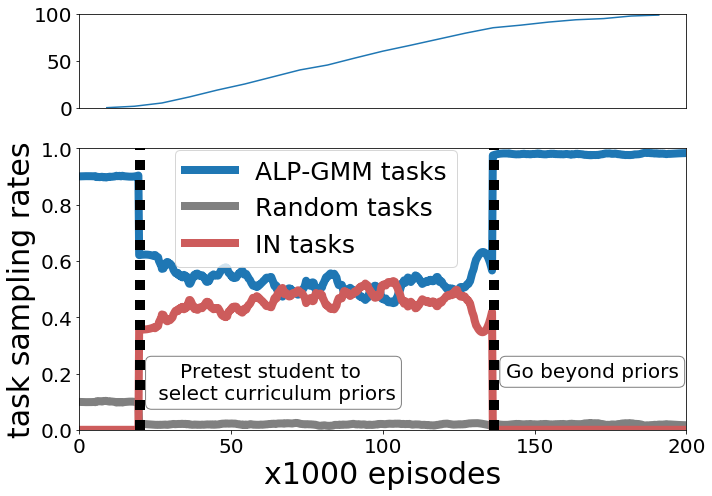

In [192]:
# TODO MAYBE TRY THIS WITH WALKERS


# generate some data
x = np.arange(0, 10, 0.2)
y = np.sin(x)

from scipy.signal import savgol_filter

for i,(m_id,label) in enumerate(labels.items()):
    if m_id != '17-07_final_toy_env_teacher_CEGT_expert_type_R_use_alpgmm_pt_2_sR': #
         continue
    nb_not_finished = 0
    print(m_id)
    runs_data = models_saves[m_id]['data']
    print(len(runs_data))
    all_alpgmm_tasks_percentage = []
    expert_identifier = []
    rots_not_finished = [0,0,0,0]
    rots_all = [0,0,0,0]
    for r,run in enumerate(runs_data):
        if r > 0:
            continue
        f, (ax0, ax) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]},figsize=(10,7))
        #ax0.plot(x, y)
        ax0.set_xticks([], [])
        ax0.locator_params(axis='y', nbins=3)
        ax0.tick_params(axis='both', which='major', labelsize=20)
        #ax0.set_xlim(xmin=0,xmax=200)
        ax0.set_ylim(bottom=0,top=100)
        ax0.plot(run['epochs_score'])
        #printrun['epochs_score']()
        

#         ### STEP 0 - Plot perfs

        
        ### STEP 1 - Plot task rate sampling
        expert_identifier.append(np.round(run['cegt_initial_expert_means'][40][0][0],2))
        rots_all[run['config']['nb_rot']] += 1
        nb_egt_updates = len(run['episodes'])
        origins = run['cegt_tasks_origin']
        expert_mean_rewards = run['cegt_initial_expert_mean_rewards']
        assert(len(expert_mean_rewards) == len(run['cegt_initial_expert_means']))
        print(expert_mean_rewards[662])
        alpgmm_tasks_percentage = []
        cegt_tasks_percentage = []
        random_tasks_percentage = []
        idx = 1
        step = 250
        unique, counts = np.unique(run['cegt_tasks_origin'], return_counts=True)
        print("s:{}, nb_ups:{}, d:{} expert_completion:{}/{}".format(run['config']['seed'],
                            nb_egt_updates, dict(zip(unique, counts)),
                            run['cegt_expert_idx'][-1],len(run['cegt_initial_expert_means'])-1))
        while idx < len(origins):
            # get percentage of tasks from alpgmm in current 1000 episode chunk
            unique, counts = np.unique(run['cegt_tasks_origin'][idx:idx+step], return_counts=True)
            d = dict(zip(unique, counts))
            if 'egt' not in d:
                d['egt'] = 0
            if 'alpgmm' not in d:
                d['alpgmm'] = 0
            if 'random' not in d:
                d['random'] = 0
            total = d['egt']+d['alpgmm']+d['random']
            alpgmm_tasks_percentage.append(d['alpgmm'] / total)
            cegt_tasks_percentage.append(d['egt'] / total)
            random_tasks_percentage.append(d['random'] / total)
            idx += step
        all_alpgmm_tasks_percentage.append(alpgmm_tasks_percentage)
        print('expert list len= {}'.format(len(run['cegt_initial_expert_means'])))
        #print(run['cegt_expert_idx'][-10:])
        if run['cegt_expert_idx'][-1] != (len(run['cegt_initial_expert_means'])-1):
            nb_not_finished += 1
            rots_not_finished[run['config']['nb_rot']] += 1
        
        #plt.figure(figsize=(10,7))
        #ax = plt.gca()
        ax.set_ylim(top=1, bottom=0)
        ax.locator_params(axis='x', nbins=5)
        ax.locator_params(axis='y', nbins=5)
        ax.tick_params(axis='both', which='major', labelsize=20)
        ax.set_xlabel('x1000 episodes', fontsize=30)
        ax.set_ylabel("task sampling rates", fontsize=30)
        
        # apply moving average to data but separates chunks by pre-train / train with AGAIN / IN done
        pretest_idx = (np.array(cegt_tasks_percentage)!=0).argmax(axis=0)
        print('pretest_idx:{}'.format(pretest_idx))
        in_done_idx = (np.array(cegt_tasks_percentage[pretest_idx:])==0).argmax(axis=0) + pretest_idx
        # apply

        #AG_data = moving_avg(,n=5)
        raw_vizu_d = [alpgmm_tasks_percentage,random_tasks_percentage,cegt_tasks_percentage]

        vizu_d = []
        print('pretest_idx:{}, in_done_idx:{}'.format(pretest_idx,in_done_idx))
        n = 41

# SVASKY FILTER
        for i,raw_d in enumerate(raw_vizu_d):
            d = savgol_filter(raw_d[1:pretest_idx], n, 3).tolist() +\
                savgol_filter(raw_d[pretest_idx:in_done_idx], n, 3).tolist() +\
                savgol_filter(raw_d[in_done_idx:], n, 3).tolist()
            vizu_d.append(d)

        pretest_len = 20
        plt.plot(vizu_d[0], color=u'#1f77b4',label='ALP-GMM tasks',linewidth=8)
        plt.plot(vizu_d[1], color='grey',label='Random tasks',linewidth=8)
        plt.plot(vizu_d[2], color='indianred',label='IN tasks',linewidth=8)
        
        ax.set_xlim(xmin=0,xmax=800)
        ax.set_ylim(bottom=0,top=1)
        vals,_ = plt.xticks()
        #print(vals)
        plt.xticks(ticks=vals,labels=[int(v/4) for v in vals])
        
        # add phase lines
        plt.axvline(pretest_idx, 0, 1, linewidth=10,color='black',linestyle=(0,(1,1)))
        plt.axvline(in_done_idx, 0, 1, linewidth=10,color='black',linestyle=(0,(1,1)))
        
        # ADD TEXT BOXES
        pretest_textstr = 'Pretest student to \n select curriculum priors'
        postin_textstr = 'Go beyond priors'

        # these are matplotlib.patch.Patch properties
        props = dict(boxstyle='round', facecolor='white', alpha=0.5)
        # place a text box in upper left in axes coords
        ax.text(0.32, 0.24, pretest_textstr, transform=ax.transAxes, fontsize=20,
                verticalalignment='top', ha='center', bbox=props)
        ax.text(0.845, 0.24, postin_textstr, transform=ax.transAxes, fontsize=20,
                verticalalignment='top', ha='center', bbox=props)

        plt.legend(fontsize=25,loc='upper center',bbox_to_anchor=(0.39,1.04))
        plt.tight_layout()
        plt.savefig('teachDRL/graphics/classroom/toy_env/AGAIN_curr_vizu/vizu_AGAIN_toy{}.png'.format(r))
        plt.savefig('teachDRL/graphics/classroom/toy_env/AGAIN_curr_vizu/vizu_AGAIN_toy{}.pdf'.format(r))
        plt.savefig('teachDRL/graphics/classroom/toy_env/AGAIN_curr_vizu/vizu_AGAIN_toy{}.svg'.format(r))
print('not finito: '+ str(nb_not_finished))
print(expert_identifier)
print(rots_not_finished)
print(rots_all)